In [18]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_orders = pd.read_pickle("../data/df_orders.pkl")
df_customers = pd.read_pickle("../data/df_customers.pkl")
df_items = pd.read_pickle("../data/df_items.pkl")
df_reviews = pd.read_pickle("../data/df_reviews.pkl")
df_products = pd.read_pickle("../data/df_products.pkl")
df_sellers = pd.read_pickle("../data/df_sellers.pkl")
df_geolocation = pd.read_pickle("../data/df_geolocation.pkl")
df_category_translation = pd.read_pickle("../data/df_category_translation.pkl")
df_payments = pd.read_pickle("../data/df_payments.pkl")

In [6]:
df_orders.head(5)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

object datatime cevirdik yƒ±l ve ay tablosu olusturduk 

In [30]:
# order_delivered_customer_date,order_purchase_timestamp s√ºtunlarƒ±nƒ± datetime'a √ßevir
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])

# Yeni s√ºtunlar olu≈üturalƒ±m: yƒ±l, ay, yƒ±l-ay (zaman serisi i√ßin)
df_orders['order_year_month'] = df_orders['order_purchase_timestamp'].dt.to_period('M')

df_orders.head(5)




order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date order_year_month  
0           2017-10-18 00:00:00          2017-10  
1           2018-08-13 00:00:00          2018-07  
2           2018-09-04 00:00:00          2018-08  
3           2017-12-15 00:00:00          2017-11  
4           2018-02-26 00:00:00          2018-02

zaman i√ßinde Aylƒ±k sipari≈ü sayƒ±sƒ±nƒ± hesaplayalƒ±m

In [ ]:

monthly_orders = df_orders.groupby('order_year_month')['order_id'].count().reset_index()
monthly_orders.columns = ['Tarih', 'Sipari≈ü Sayƒ±sƒ±']
monthly_orders.head(20)


Tarih  Sipari≈ü Sayƒ±sƒ±
0   2016-09               4
1   2016-10             324
2   2016-12               1
3   2017-01             800
4   2017-02            1780
5   2017-03            2682
6   2017-04            2404
7   2017-05            3700
8   2017-06            3245
9   2017-07            4026
10  2017-08            4331
11  2017-09            4285
12  2017-10            4631
13  2017-11            7544
14  2017-12            5673
15  2018-01            7269
16  2018-02            6728
17  2018-03            7211
18  2018-04            6939
19  2018-05            6873

In [24]:
# Tarihi datetime'a √ßevir (grafik i√ßin)
monthly_orders['Tarih'] = monthly_orders['Tarih'].dt.to_timestamp()

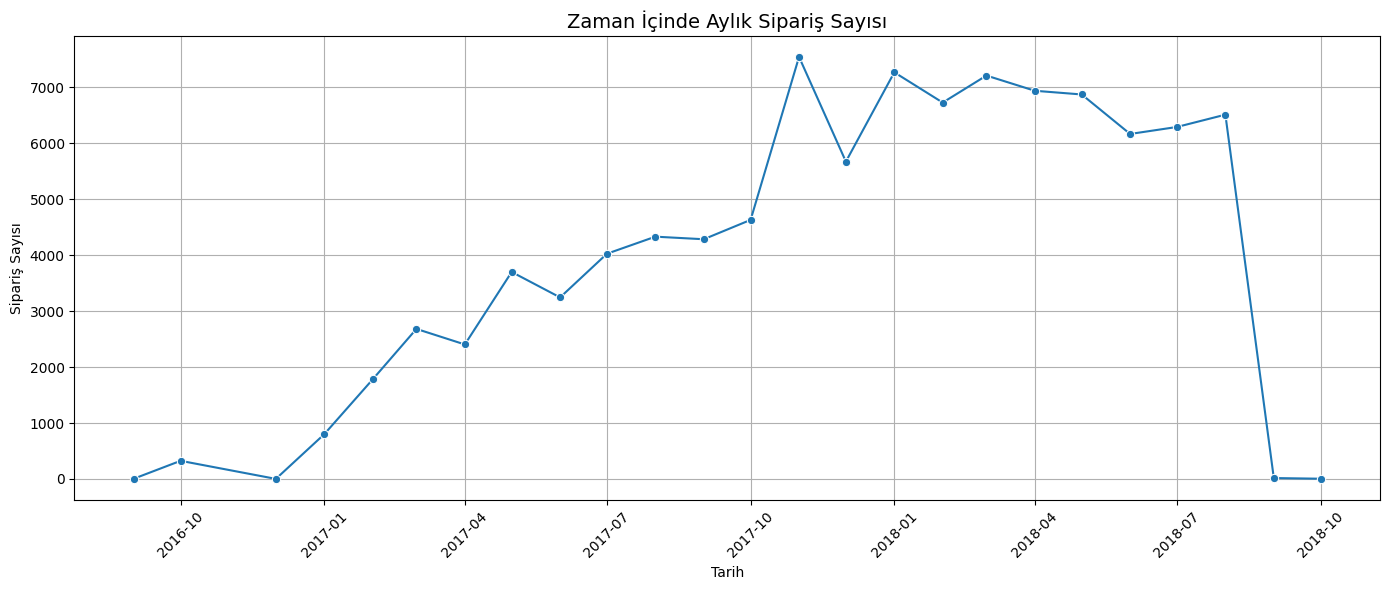

In [26]:

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_orders, x='Tarih', y='Sipari≈ü Sayƒ±sƒ±', marker='o')
plt.title('Zaman ƒ∞√ßinde Aylƒ±k Sipari≈ü Sayƒ±sƒ±', fontsize=14)
plt.xlabel('Tarih')
plt.ylabel('Sipari≈ü Sayƒ±sƒ±')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

üìà 2017‚Äônin ortasƒ±ndan itibaren sipari≈ü sayƒ±sƒ±nda d√ºzenli bir artƒ±≈ü g√∂zleniyor.

üìÜ Kasƒ±m ve Aralƒ±k aylarƒ±nda belirgin bir artƒ±≈ü var; bu da yƒ±l sonu alƒ±≈üveri≈ü sezonunun etkisi olabilir.

üìâ 2016‚Äônƒ±n son √ßeyreƒüinde d√º≈ü√ºk sipari≈ü sayƒ±larƒ± dikkat √ßekiyor; veri setinin ba≈ülangƒ±√ß kƒ±smƒ± olabilir.

üìä Sezonluk etkiler satƒ±≈ü planlamasƒ± i√ßin √∂nemli bir ipucu sunuyor.

 Sipari≈ü durumu bazƒ±nda sipari≈ü sayƒ±sƒ±nƒ± ve oranƒ±nƒ± hesaplayalƒ±m

In [ ]:

status_counts = df_orders['order_status'].value_counts() 
status_percent = (status_counts / len(df_orders) * 100).round(2) #y√ºzde 

# Sonu√ßlarƒ± tablo haline getirelim
status_summary = pd.DataFrame({
    'Sipari≈ü Durumu': status_counts.index,
    'Sipari≈ü Sayƒ±sƒ±': status_counts.values,
    'Y√ºzde (%)': status_percent.values
})

print(status_summary)


# - delivered: Sipari≈ülerin b√ºy√ºk √ßoƒüunluƒüu ba≈üarƒ±lƒ± bir ≈üekilde teslim edilmi≈ü.
# - shipped: Kargoya verilmi≈ü ancak hen√ºz teslim edilmemi≈ü sipari≈üler.
# - canceled: ƒ∞ptal edilen sipari≈üler, i≈ü s√ºre√ßlerindeki sorunlar veya m√º≈üteri kararƒ± olabilir.
# - invoiced, processing, unavailable, created, approved: Sipari≈üin diƒüer farklƒ± a≈üamalarƒ±nƒ± g√∂sterir; bunlarƒ±n oranlarƒ± d√º≈ü√ºk olabilir.
# Bu daƒüƒ±lƒ±m, lojistik ve m√º≈üteri deneyimini anlamak i√ßin √∂nemli.


  Sipari≈ü Durumu  Sipari≈ü Sayƒ±sƒ±  Y√ºzde (%)
0      delivered           96478      97.02
1        shipped            1107       1.11
2       canceled             625       0.63
3    unavailable             609       0.61
4       invoiced             314       0.32
5     processing             301       0.30
6        created               5       0.01
7       approved               2       0.00


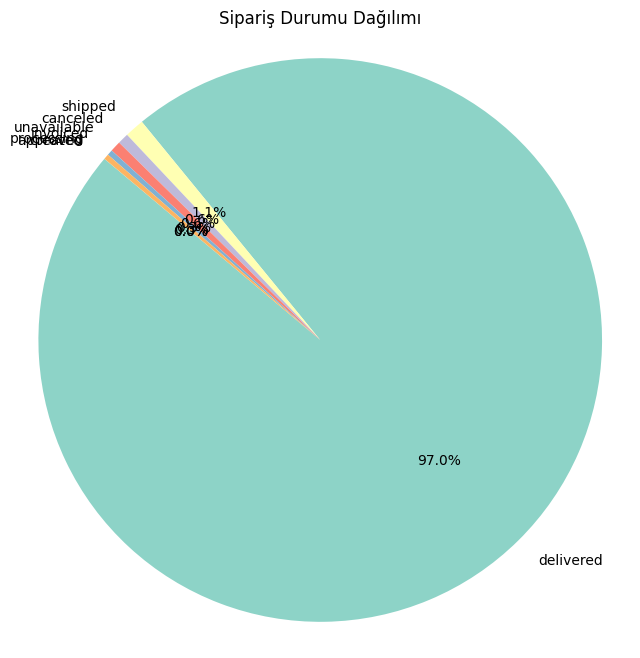

In [42]:
import matplotlib.pyplot as plt

# Sipari≈ü durumlarƒ±na g√∂re gruplama ve sayma
order_status_counts = df_orders['order_status'].value_counts()
order_status_percent = (order_status_counts / len(df_orders) * 100).round(2)

# Grafik i√ßin veriyi hazƒ±rlama
labels = order_status_counts.index
sizes = order_status_counts.values

# Renk paleti (isteƒüe g√∂re √∂zelle≈ütirilebilir)
colors = plt.cm.Set3(range(len(labels)))

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sipari≈ü Durumu Daƒüƒ±lƒ±mƒ±')
plt.axis('equal')  # Daire ≈üeklinde g√∂sterim
plt.show()


sipari≈ülerin tahmini teslim s√ºresini hesaplayalƒ±m 

In [49]:

# Sadece teslim edilmi≈ü sipari≈üleri alalƒ±m
df_delivered = df_orders[df_orders['order_status'] == 'delivered'].copy()

# Teslim s√ºresi (g√ºn olarak) hesaplayalƒ±m
df_delivered['teslim_suresi_gun'] = (df_delivered['order_delivered_customer_date'] - df_delivered['order_purchase_timestamp']).dt.days

# ƒ∞lk birka√ß √∂rneƒüi g√∂relim
df_delivered[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'teslim_suresi_gun']].head(10)


order_id order_purchase_timestamp  \
0   e481f51cbdc54678b7cc49136f2d6af7      2017-10-02 10:56:33   
1   53cdb2fc8bc7dce0b6741e2150273451      2018-07-24 20:41:37   
2   47770eb9100c2d0c44946d9cf07ec65d      2018-08-08 08:38:49   
3   949d5b44dbf5de918fe9c16f97b45f8a      2017-11-18 19:28:06   
4   ad21c59c0840e6cb83a9ceb5573f8159      2018-02-13 21:18:39   
5   a4591c265e18cb1dcee52889e2d8acc3      2017-07-09 21:57:05   
7   6514b8ad8028c9f2cc2374ded245783f      2017-05-16 13:10:30   
8   76c6e866289321a7c93b82b54852dc33      2017-01-23 18:29:09   
9   e69bfb5eb88e0ed6a785585b27e16dbf      2017-07-29 11:55:02   
10  e6ce16cb79ec1d90b1da9085a6118aeb      2017-05-16 19:41:10   

   order_delivered_customer_date  teslim_suresi_gun  
0            2017-10-10 21:25:13                8.0  
1            2018-08-07 15:27:45               13.0  
2            2018-08-17 18:06:29                9.0  
3            2017-12-02 00:28:42               13.0  
4            2018-02-16 18:17:02                2.0  
5            2017-07-26 10:57:55               16.0  
7            2017-05-26 12:55:51                9.0  
8            2017-02-02 14:08:10                9.0  
9            2017-08-16 17:14:30               18.0  
10           2017-05-29 11:18:31               12.0

In [50]:
# Ortalama teslim s√ºresi
ortalama_teslim_suresi = df_delivered['teslim_suresi_gun'].mean().round(2)
print(ortalama_teslim_suresi)

12.09


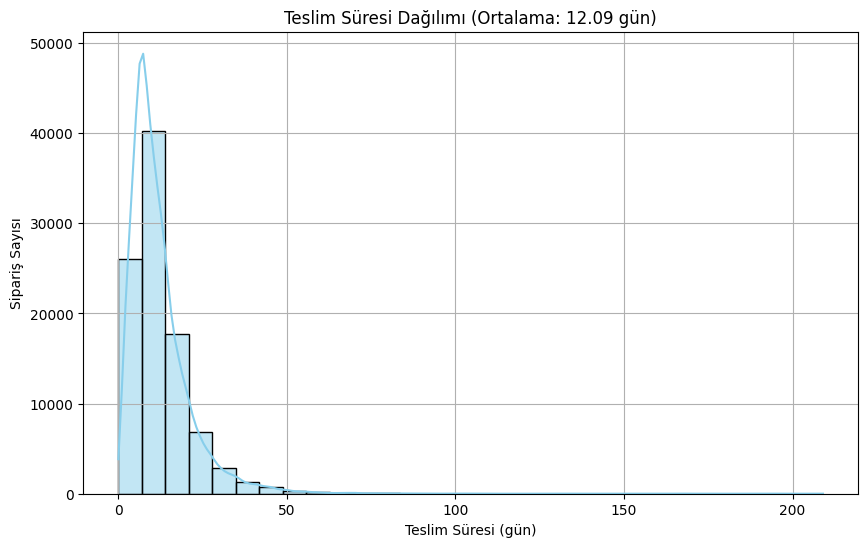

In [35]:

plt.figure(figsize=(10,6))
sns.histplot(df_delivered['teslim_suresi_gun'], bins=30, kde=True, color='skyblue')
plt.title(f'Teslim S√ºresi Daƒüƒ±lƒ±mƒ± (Ortalama: {ortalama_teslim_suresi} g√ºn)')
plt.xlabel('Teslim S√ºresi (g√ºn)')
plt.ylabel('Sipari≈ü Sayƒ±sƒ±')
plt.grid(True)
plt.show()


0-50 g√ºn arsƒ±ndaki teslim s√ºrelerini detaylƒ± tabloda inceleme

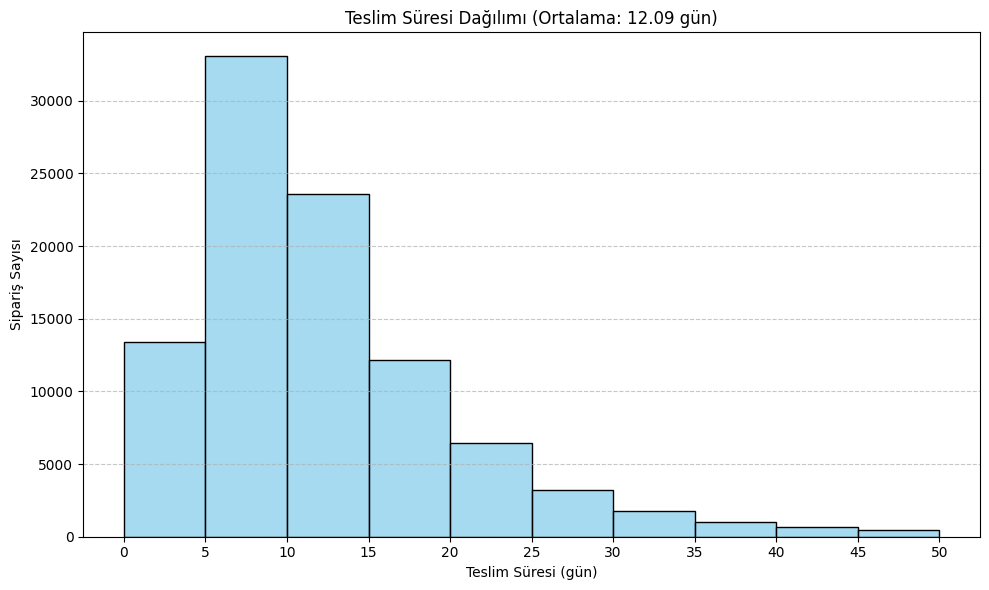

In [40]:
plt.figure(figsize=(10,6))

# 0'dan 50'ye kadar 5'er artan aralƒ±klarla bin olu≈üturuyoruz
bins = np.arange(0, 55, 5)

sns.histplot(df_delivered['teslim_suresi_gun'], bins=bins, kde=False, color='skyblue', edgecolor='black')

plt.title(f'Teslim S√ºresi Daƒüƒ±lƒ±mƒ± (Ortalama: {ortalama_teslim_suresi} g√ºn)')
plt.xlabel('Teslim S√ºresi (g√ºn)')
plt.ylabel('Sipari≈ü Sayƒ±sƒ±')
plt.xticks(bins)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 Ay Bazƒ±nda Ortalama Teslim S√ºresi

C:\Users\Dell\AppData\Local\Temp\ipykernel_16456\951987319.py:17: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Dell\Olist E-Commerce Analytics Project\Olist-E-Commerce-Analytics-Project\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


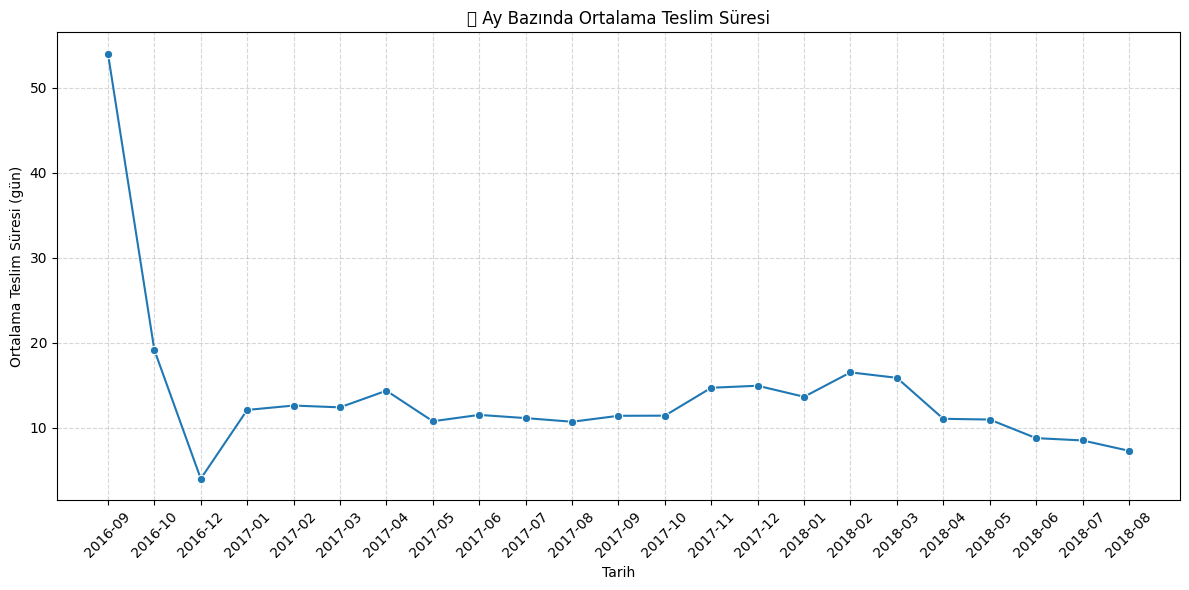

In [38]:
# Sipari≈ü tarihi ile teslim tarihi arasƒ±ndaki farkƒ± zaten 'teslim_suresi_gun' olarak hesaplamƒ±≈ütƒ±k
# Sipari≈ü tarihini yƒ±l-ay formatƒ±na √ßeviriyoruz
df_delivered['order_year_month'] = df_delivered['order_purchase_timestamp'].dt.to_period('M').astype(str)

# Ay bazƒ±nda ortalama teslim s√ºresini hesaplƒ±yoruz
monthly_avg_delivery = df_delivered.groupby('order_year_month')['teslim_suresi_gun'].mean().reset_index()
monthly_avg_delivery.columns = ['Tarih', 'Ortalama Teslim S√ºresi (g√ºn)']

# G√∂rselle≈ütirme
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_avg_delivery, x='Tarih', y='Ortalama Teslim S√ºresi (g√ºn)', marker='o')
plt.xticks(rotation=45)
plt.title('üì¶ Ay Bazƒ±nda Ortalama Teslim S√ºresi')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Teslim S√ºresi (g√ºn)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


df_customers

In [45]:
df_customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [57]:
df_customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


benzersiz m√º≈üteri sayƒ±sƒ±nƒ± ve ≈üehir, eyalet gibi kategorik deƒüi≈ükenlerin √ße≈üitliliƒüi

In [58]:
print("Toplam kayƒ±t sayƒ±sƒ±:", len(df_customers))
print("Benzersiz customer_id sayƒ±sƒ±:", df_customers['customer_id'].nunique())
print("Benzersiz customer_unique_id sayƒ±sƒ±:", df_customers['customer_unique_id'].nunique())
print("Farklƒ± ≈üehir sayƒ±sƒ±:", df_customers['customer_city'].nunique())
print("Farklƒ± eyalet sayƒ±sƒ±:", df_customers['customer_state'].nunique())


Toplam kayƒ±t sayƒ±sƒ±: 99441
Benzersiz customer_id sayƒ±sƒ±: 99441
Benzersiz customer_unique_id sayƒ±sƒ±: 96096
Farklƒ± ≈üehir sayƒ±sƒ±: 4119
Farklƒ± eyalet sayƒ±sƒ±: 27


M√ú≈ûTERƒ∞LERƒ∞N EYALET BAZINDAKƒ∞ DAƒûILIMLARI

In [63]:

state_counts = df_customers['customer_state'].value_counts().reset_index()
state_counts.columns = ['customer_state', 'count']

print(state_counts.head(10))



  customer_state  count
0             SP  41746
1             RJ  12852
2             MG  11635
3             RS   5466
4             PR   5045
5             SC   3637
6             BA   3380
7             DF   2140
8             ES   2033
9             GO   2020


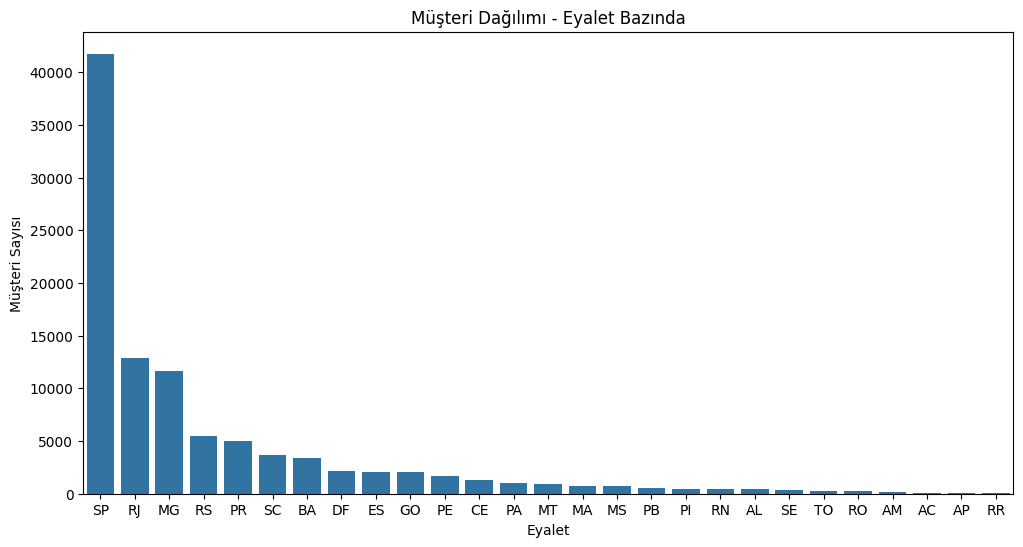

In [65]:
plt.figure(figsize=(12,6))
sns.barplot(data=state_counts, x='customer_state', y='count', order=state_counts['customer_state'])
plt.title('M√º≈üteri Daƒüƒ±lƒ±mƒ± - Eyalet Bazƒ±nda')
plt.xlabel('Eyalet')
plt.ylabel('M√º≈üteri Sayƒ±sƒ±')
plt.show()

≈ûehir bazƒ±nda m√º≈üteri sayƒ±sƒ±

In [80]:

city_counts = df_customers['customer_city'].value_counts().reset_index()
city_counts.columns = ['customer_city', 'count']

print(city_counts.head(10))

           customer_city  count
0              sao paulo  15540
1         rio de janeiro   6882
2         belo horizonte   2773
3               brasilia   2131
4               curitiba   1521
5               campinas   1444
6           porto alegre   1379
7               salvador   1245
8              guarulhos   1189
9  sao bernardo do campo    938


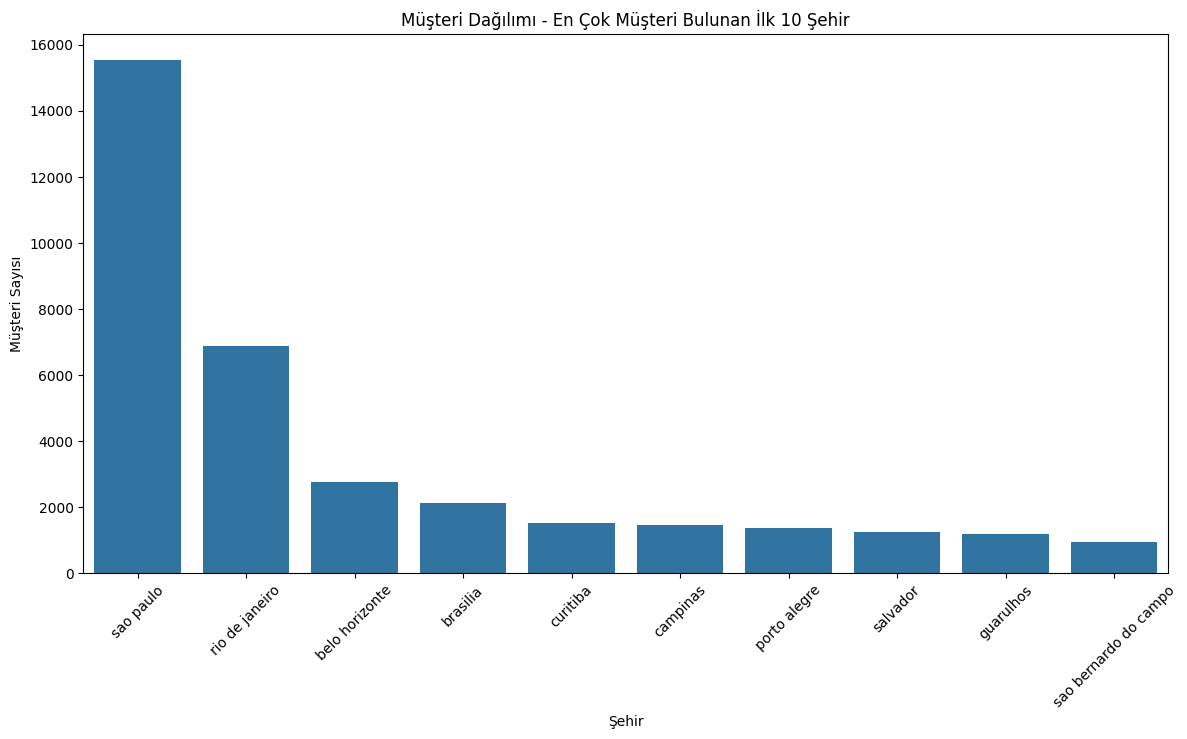

In [81]:
# Grafik √ßizimi
plt.figure(figsize=(14,7))
sns.barplot(data=top_cities, x='customer_city', y='count', order=top_cities['customer_city'])
plt.title('M√º≈üteri Daƒüƒ±lƒ±mƒ± - En √áok M√º≈üteri Bulunan ƒ∞lk 10 ≈ûehir')
plt.xlabel('≈ûehir')
plt.ylabel('M√º≈üteri Sayƒ±sƒ±')
plt.xticks(rotation=45)
plt.show()



Posta kodlarƒ±na g√∂re m√º≈üteri sayƒ±sƒ± DataFrame olu≈üturma ve en yoƒüun 10 posta kodunu bulma:

In [83]:
zip_counts = df_customers['customer_zip_code_prefix'].value_counts().reset_index()
zip_counts.columns = ['customer_zip_code_prefix', 'count']

print(zip_counts.head(10))


   customer_zip_code_prefix  count
0                     22790    142
1                     24220    124
2                     22793    121
3                     24230    117
4                     22775    110
5                     29101    101
6                     13212     95
7                     35162     93
8                     22631     89
9                     38400     87


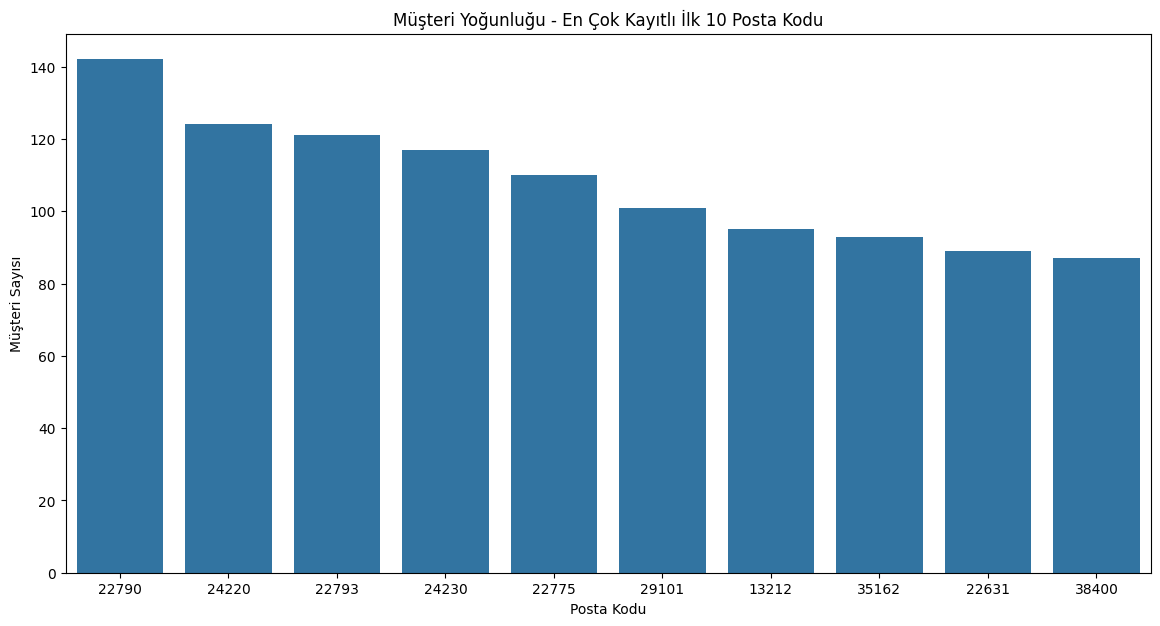

In [84]:
plt.figure(figsize=(14,7))
sns.barplot(data=top_zip_codes, x='customer_zip_code_prefix', y='count', order=top_zip_codes['customer_zip_code_prefix'])
plt.title('M√º≈üteri Yoƒüunluƒüu - En √áok Kayƒ±tlƒ± ƒ∞lk 10 Posta Kodu')
plt.xlabel('Posta Kodu')
plt.ylabel('M√º≈üteri Sayƒ±sƒ±')
plt.show()

 Aynƒ± m√º≈üteri (customer_unique_id) birden fazla kayƒ±t yapmƒ±≈ü mƒ±, ka√ß m√º≈üteri birden fazla kayƒ±tlƒ±?

In [61]:
# Her unique customer_id ka√ß kere ge√ßmi≈ü?
customer_counts = df_customers['customer_unique_id'].value_counts()

# Birden fazla kaydƒ± olan m√º≈üteriler:
multiple_records = customer_counts[customer_counts > 1]

print("Birden fazla kaydƒ± olan m√º≈üteri sayƒ±sƒ±:", multiple_records.count())
print("Toplam kayƒ±t sayƒ±sƒ±na oranƒ±: {:.2f}%".format(multiple_records.count() / df_customers['customer_unique_id'].nunique() * 100))


Birden fazla kaydƒ± olan m√º≈üteri sayƒ±sƒ±: 2997
Toplam kayƒ±t sayƒ±sƒ±na oranƒ±: 3.12%


In [112]:
# df_orders ile customer_unique_id bilgilerini birle≈ütiriyoruz
df_orders_customers_unique = df_orders.merge(df_customers[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']], on='customer_id', how='left')

# Unique m√º≈üteri ba≈üƒ±na sipari≈ü sayƒ±sƒ±
orders_per_unique_customer = df_orders_customers_unique.groupby('customer_unique_id')['order_id'].nunique()

print("Unique m√º≈üteri ba≈üƒ±na ortalama sipari≈ü sayƒ±sƒ±:", orders_per_unique_customer.mean())
print("Birden fazla sipari≈ü veren unique m√º≈üteri sayƒ±sƒ±:", (orders_per_unique_customer > 1).sum())
print("Toplam unique m√º≈üteri sayƒ±sƒ± (sipari≈ü veren):", orders_per_unique_customer.count())


Unique m√º≈üteri ba≈üƒ±na ortalama sipari≈ü sayƒ±sƒ±: 1.0348089410589412
Birden fazla sipari≈ü veren unique m√º≈üteri sayƒ±sƒ±: 2997
Toplam unique m√º≈üteri sayƒ±sƒ± (sipari≈ü veren): 96096


df_orders ve df_customers'ƒ± customer_id √ºzerinden birle≈ütiriyoruz

In [96]:
df_orders_customers = df_orders.merge(df_customers[['customer_id', 'customer_city', 'customer_state']], on='customer_id', how='left')

df_orders_customers.head()


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date order_year_month            customer_city  \
0           2017-10-18 00:00:00          2017-10                sao paulo   
1           2018-08-13 00:00:00          2018-07                barreiras   
2           2018-09-04 00:00:00          2018-08               vianopolis   
3           2017-12-15 00:00:00          2017-11  sao goncalo do amarante   
4           2018-02-26 00:00:00          2018-02              santo andre   

  customer_state  
0             SP  
1             BA  
2             GO  
3             RN  
4             SP

≈ûehirlere g√∂re toplam sipari≈ü sayƒ±sƒ±

In [97]:

orders_by_city = df_orders_customers['customer_city'].value_counts().reset_index()
orders_by_city.columns = ['customer_city', 'order_count']

print(orders_by_city.head(10))




           customer_city  order_count
0              sao paulo        15540
1         rio de janeiro         6882
2         belo horizonte         2773
3               brasilia         2131
4               curitiba         1521
5               campinas         1444
6           porto alegre         1379
7               salvador         1245
8              guarulhos         1189
9  sao bernardo do campo          938


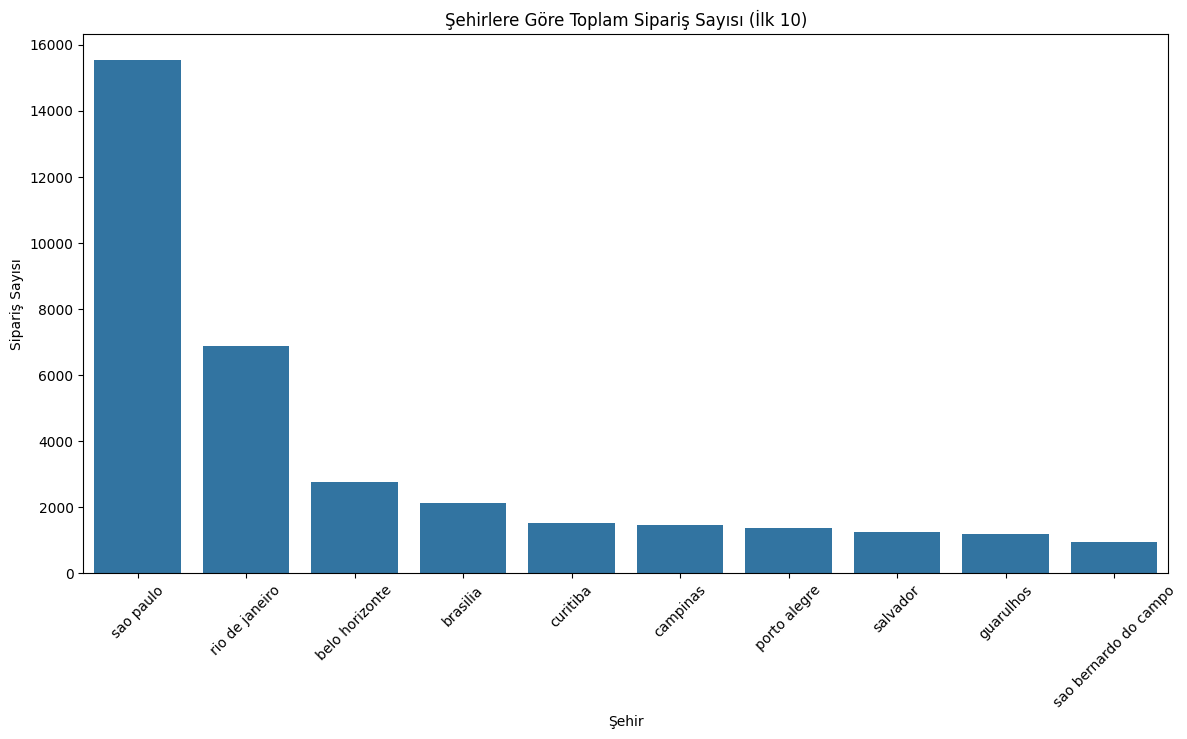

In [98]:
plt.figure(figsize=(14,7))
sns.barplot(data=top_10_cities, x='customer_city', y='order_count', order=top_10_cities['customer_city'])
plt.title('≈ûehirlere G√∂re Toplam Sipari≈ü Sayƒ±sƒ± (ƒ∞lk 10)')
plt.xlabel('≈ûehir')
plt.ylabel('Sipari≈ü Sayƒ±sƒ±')
plt.xticks(rotation=45)
plt.show()

≈üehirlere g√∂re hem m√º≈üteri sayƒ±sƒ±nƒ± hem de sipari≈ü sayƒ±sƒ±nƒ± bir arada inceleme

In [ ]:



# Sipari≈ü sayƒ±sƒ± zaten elimizdeydi, tekrar edelim:
orders_by_city = df_orders_customers['customer_city'].value_counts().reset_index()
orders_by_city.columns = ['customer_city', 'order_count']

# ƒ∞ki tabloyu birle≈ütirelim
city_summary = customers_by_city.merge(orders_by_city, on='customer_city')

city_summary.head()


customer_city  customer_count  order_count
0       sao paulo           15540        15540
1  rio de janeiro            6882         6882
2  belo horizonte            2773         2773
3        brasilia            2131         2131
4        curitiba            1521         1521

In [110]:

# 1. ≈ûehirlere g√∂re m√º≈üteri sayƒ±sƒ±
customers_by_city = df_customers['customer_city'].value_counts().reset_index()
customers_by_city.columns = ['customer_city', 'customer_count']

# 2. ≈ûehirlere g√∂re benzersiz sipari≈ü sayƒ±sƒ±
orders_by_city = df_orders_customers.groupby('customer_city')['order_id'].nunique().reset_index()
orders_by_city.columns = ['customer_city', 'order_count']

# 3. ƒ∞ki tabloyu birle≈ütiriyoruz
city_summary = customers_by_city.merge(orders_by_city, on='customer_city')

city_summary.head(10)


customer_city  customer_count  order_count
0              sao paulo           15540        15540
1         rio de janeiro            6882         6882
2         belo horizonte            2773         2773
3               brasilia            2131         2131
4               curitiba            1521         1521
5               campinas            1444         1444
6           porto alegre            1379         1379
7               salvador            1245         1245
8              guarulhos            1189         1189
9  sao bernardo do campo             938          938

In [111]:
# Her m√º≈üterinin ka√ß sipari≈üi var?
orders_per_customer = df_orders.groupby('customer_id')['order_id'].nunique()

# Ortalama sipari≈ü sayƒ±sƒ±
print("M√º≈üteri ba≈üƒ±na ortalama sipari≈ü sayƒ±sƒ±:", orders_per_customer.mean())

# Ka√ß m√º≈üteri 1'den fazla sipari≈ü vermi≈ü?
print("Birden fazla sipari≈ü veren m√º≈üteri sayƒ±sƒ±:", (orders_per_customer > 1).sum())

# Toplam m√º≈üteri sayƒ±sƒ±
print("Toplam m√º≈üteri sayƒ±sƒ± (sipari≈ü veren):", orders_per_customer.count())


M√º≈üteri ba≈üƒ±na ortalama sipari≈ü sayƒ±sƒ±: 1.0
Birden fazla sipari≈ü veren m√º≈üteri sayƒ±sƒ±: 0
Toplam m√º≈üteri sayƒ±sƒ± (sipari≈ü veren): 99441


In [118]:
# 1. Birle≈ütirme: customer_id √ºzerinden, gerekli kolonlarla birlikte
df_orders_customers = df_orders.merge(
    df_customers[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']],
    on='customer_id',
    how='left'
)

# 2. Her unique m√º≈üteri i√ßin sipari≈ü sayƒ±sƒ±
orders_per_unique_customer = df_orders_customers.groupby('customer_unique_id')['order_id'].nunique()

# 3. Sipari≈ü sayƒ±larƒ±nƒ±n daƒüƒ±lƒ±mƒ±
order_counts_distribution = orders_per_unique_customer.value_counts().sort_index()

# 4. Ortalama sipari≈ü sayƒ±sƒ±
average_orders_per_customer = orders_per_unique_customer.mean()

# 5. Birden fazla sipari≈ü veren m√º≈üteri sayƒ±sƒ±
multiple_orders_customers_count = orders_per_unique_customer[orders_per_unique_customer > 1].count()

# 6. Toplam unique m√º≈üteri sayƒ±sƒ± (sipari≈ü veren)
total_unique_customers = orders_per_unique_customer.count()

print("Sipari≈ü sayƒ±larƒ±nƒ±n daƒüƒ±lƒ±mƒ±:\n", order_counts_distribution)
print(f"\nUnique m√º≈üteri ba≈üƒ±na ortalama sipari≈ü sayƒ±sƒ±: {average_orders_per_customer:.4f}")
print(f"Birden fazla sipari≈ü veren unique m√º≈üteri sayƒ±sƒ±: {multiple_orders_customers_count}")
print(f"Toplam unique m√º≈üteri sayƒ±sƒ± (sipari≈ü veren): {total_unique_customers}")


Sipari≈ü sayƒ±larƒ±nƒ±n daƒüƒ±lƒ±mƒ±:
 order_id
1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
Name: count, dtype: int64

Unique m√º≈üteri ba≈üƒ±na ortalama sipari≈ü sayƒ±sƒ±: 1.0348
Birden fazla sipari≈ü veren unique m√º≈üteri sayƒ±sƒ±: 2997
Toplam unique m√º≈üteri sayƒ±sƒ± (sipari≈ü veren): 96096


In [119]:
missing_city_orders = df_orders_customers['customer_city'].isna().sum()
print(f"≈ûehir bilgisi olmayan sipari≈ü sayƒ±sƒ±: {missing_city_orders}")




≈ûehir bilgisi olmayan sipari≈ü sayƒ±sƒ±: 0


. ≈ûehirlere g√∂re toplam sipari≈ü sayƒ±sƒ±nƒ± ve m√º≈üteri sayƒ±sƒ±nƒ± daha detaylƒ± kar≈üƒ±la≈ütƒ±r

In [120]:
# ≈ûehir bazƒ±nda m√º≈üteri sayƒ±sƒ±
customers_by_city = df_customers.groupby('customer_city')['customer_unique_id'].nunique().reset_index()
customers_by_city.columns = ['customer_city', 'unique_customer_count']

# ≈ûehir bazƒ±nda sipari≈ü sayƒ±sƒ±
orders_by_city = df_orders_customers.groupby('customer_city')['order_id'].nunique().reset_index()
orders_by_city.columns = ['customer_city', 'unique_order_count']

# ƒ∞kisini birle≈ütir
city_summary = customers_by_city.merge(orders_by_city, on='customer_city', how='outer').fillna(0)

# Ortalama sipari≈ü sayƒ±sƒ± (≈üehir bazƒ±nda)
city_summary['avg_orders_per_customer'] = city_summary['unique_order_count'] / city_summary['unique_customer_count']

city_summary.sort_values(by='unique_customer_count', ascending=False).head(10)


customer_city  unique_customer_count  unique_order_count  \
3597              sao paulo                  14984               15540   
3155         rio de janeiro                   6620                6882   
453          belo horizonte                   2672                2773   
558                brasilia                   2069                2131   
1143               curitiba                   1465                1521   
707                campinas                   1398                1444   
2964           porto alegre                   1326                1379   
3247               salvador                   1209                1245   
1529              guarulhos                   1153                1189   
3428  sao bernardo do campo                    908                 938   

      avg_orders_per_customer  
3597                 1.037106  
3155                 1.039577  
453                  1.037799  
558                  1.029966  
1143                 1.038225  
707                  1.032904  
2964                 1.039970  
3247                 1.029777  
1529                 1.031223  
3428                 1.033040

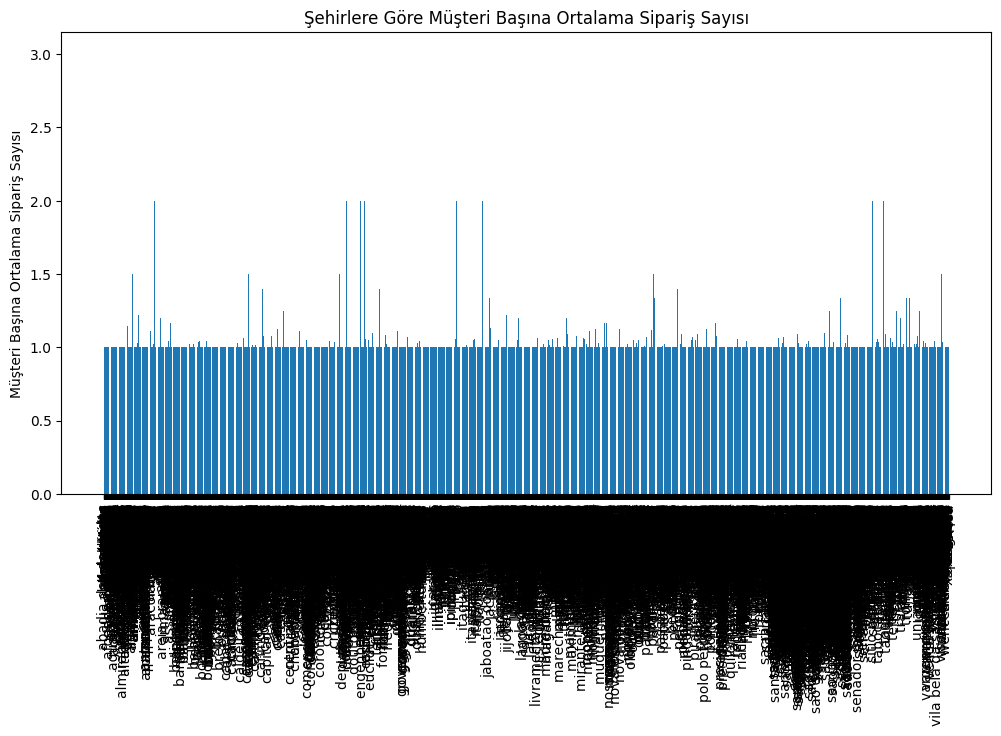

In [122]:
plt.figure(figsize=(12,6))
plt.bar(city_summary['customer_city'], city_summary['avg_orders_per_customer'])
plt.xticks(rotation=90)
plt.ylabel('M√º≈üteri Ba≈üƒ±na Ortalama Sipari≈ü Sayƒ±sƒ±')
plt.title('≈ûehirlere G√∂re M√º≈üteri Ba≈üƒ±na Ortalama Sipari≈ü Sayƒ±sƒ±')
plt.show()


n Y√ºksek Repeat Purchase Rate‚Äôe Sahip ƒ∞lk 10 ≈ûehir

            customer_city  unique_customer_count  unique_order_count  \
315                aruana                      1                   2   
1945                 jari                      2                   4   
1053            corguinho                      1                   2   
1781              itamira                      1                   2   
3670       senador amaral                      1                   2   
2204         mar vermelho                      1                   2   
1819             itapiuna                      1                   2   
2816            piacabucu                      1                   2   
382     barao de cotegipe                      1                   2   
2910  planaltina de goias                      1                   2   

      avg_orders_per_customer  repeat_rate  
315                       2.0          1.0  
1945                      2.0          1.0  
1053                      2.0          1.0  
1781                      2

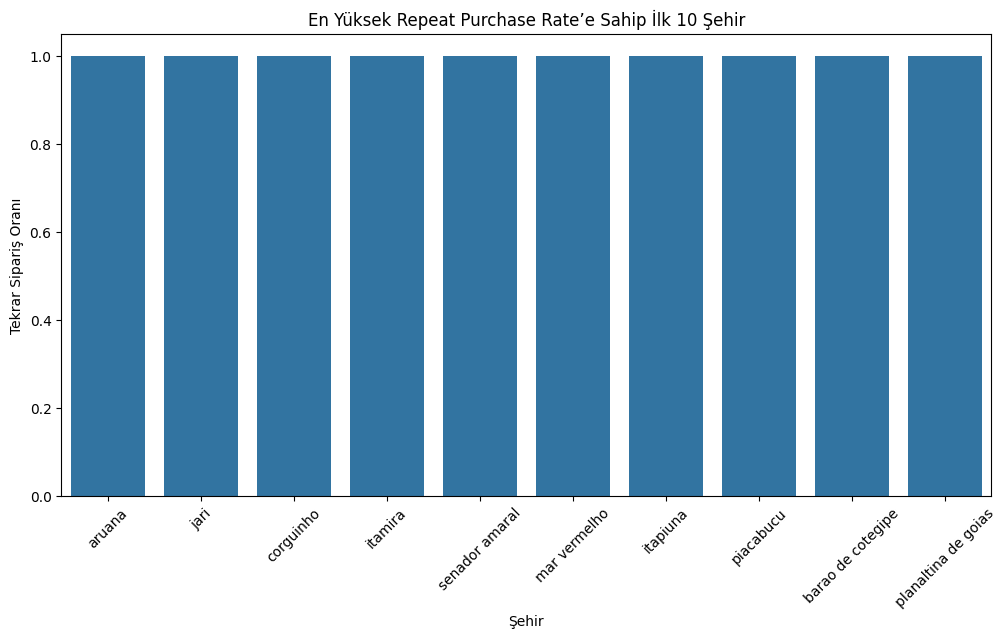

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. df_orders ile df_customers‚Äôƒ± customer_id √ºzerinden birle≈ütir (customer_unique_id ve city‚Äôyi ekle)
df_orders_customers = df_orders.merge(
    df_customers[['customer_id', 'customer_unique_id', 'customer_city']],
    on='customer_id',
    how='left'
)

# 2. ≈ûehir + unique m√º≈üteri bazƒ±nda sipari≈ü sayƒ±sƒ±nƒ± hesapla
orders_unique = (
    df_orders_customers
      .groupby(['customer_city', 'customer_unique_id'])['order_id']
      .nunique()
      .reset_index(name='order_count')
)

# 3. ‚ÄúRepeat‚Äù (birden fazla sipari≈ü) flag‚Äôi ekle
orders_unique['repeat'] = orders_unique['order_count'] > 1

# 4. ≈ûehir bazƒ±nda repeat rate‚Äôi hesapla
repeat_rate = (
    orders_unique
      .groupby('customer_city')['repeat']
      .mean()
      .reset_index(name='repeat_rate')
)

# 5. Daha √∂nce olu≈üturduƒüun city_summary ile birle≈ütir (opsiyonel, ek baƒülam i√ßin)
city_summary_extended = city_summary.merge(repeat_rate, on='customer_city', how='left').fillna(0)

# 6. En y√ºksek 10 ≈üehri se√ß
top_repeat_cities = city_summary_extended.sort_values('repeat_rate', ascending=False).head(10)

# 7. Tabloyu g√∂r√ºnt√ºle
print(top_repeat_cities[['customer_city', 'unique_customer_count', 'unique_order_count', 'avg_orders_per_customer', 'repeat_rate']])

# 8. √áubuk grafikle g√∂rselle≈ütir
plt.figure(figsize=(12,6))
sns.barplot(data=top_repeat_cities, x='customer_city', y='repeat_rate')
plt.title('En Y√ºksek Repeat Purchase Rate‚Äôe Sahip ƒ∞lk 10 ≈ûehir')
plt.xlabel('≈ûehir')
plt.ylabel('Tekrar Sipari≈ü Oranƒ±')
plt.xticks(rotation=45)
plt.show()


Bu analiz sana ≈üunlarƒ± g√∂sterecek:

Hangi ≈üehirlerde m√º≈üterilerin tekrar sipari≈ü verme oranƒ± daha y√ºksek?

Tekrar sipari≈ü oranƒ± y√ºksek ≈üehirlerde sadakat programƒ±, √∂zel kampanyalar veya CRM odaklƒ± aksiyonlar geli≈ütirebilirsin.

√ñzellikle repeat_rate‚Äôin d√º≈ü√ºk olduƒüu b√ºy√ºk ≈üehirlerde (√∂rneƒüin S√£o Paulo‚Äôda) tekrar sipari≈üi artƒ±rmak i√ßin ek stratejiler d√º≈ü√ºnebilirsin.

G√ºzel, sonu√ßlar ger√ßekten de ‚Äúen y√ºksek repeat rate‚Äùi veriyor ama burada %100 repeat‚Äôe sahip ≈üehirler, aslƒ±nda yalnƒ±zca 1 unique m√º≈üteriden (ve onun 2 sipari≈üinden) olu≈üan √ßok k√º√ß√ºk yerle≈üimler. Bu, analizde ‚Äúk√º√ß√ºk √∂rneklem‚Äùten kaynaklanan bir yanƒ±lsama.

Bir sonraki adƒ±m: √∂rneklem b√ºy√ºkl√ºƒü√º filtresi
Bu t√ºr sapmalarƒ± √∂nlemek i√ßin ‚Äúen az X benzersiz m√º≈üteri‚Äù kriteri koyup, ardƒ±ndan repeat rate‚Äôe bakalƒ±m. Mesela en az 100 unique m√º≈üteri olan ≈üehirleri se√ßip, onlarƒ±n repeat rate‚Äôine g√∂re sƒ±ralayalƒ±m:

In [124]:
# city_summary_extended √∂ncesinde olu≈üturulmu≈ü olmasƒ± gerekiyor
# 1. Minimum m√º≈üteri sayƒ±sƒ± filtresi (√∂rn. 100 m√º≈üteri)
filtered = city_summary_extended[city_summary_extended['unique_customer_count'] >= 100]

# 2. Repeat rate‚Äôe g√∂re sƒ±rala ve en y√ºksek 10‚Äôu al
top_repeat_filtered = filtered.sort_values('repeat_rate', ascending=False).head(10)

print(top_repeat_filtered[['customer_city','unique_customer_count','unique_order_count','avg_orders_per_customer','repeat_rate']])


             customer_city  unique_customer_count  unique_order_count  \
2815            petropolis                    220                 240   
208   aparecida de goiania                    104                 110   
2995          pouso alegre                    124                 131   
2936          ponta grossa                    135                 143   
2098               limeira                    181                 190   
2501         nova friburgo                    145                 152   
1390       franco da rocha                    104                 109   
2986           porto velho                    105                 113   
2167                  mage                    106                 111   
900          caxias do sul                    213                 224   

      avg_orders_per_customer  repeat_rate  
2815                 1.090909     0.063636  
208                  1.057692     0.057692  
2995                 1.056452     0.056452  
2936            

Bu sƒ±nƒ±rƒ± ge√ßtikten sonra b√ºy√ºk ≈üehirler ve orta √∂l√ßekliler arasƒ±ndaki ger√ßek ‚Äúrepeat behavior‚Äù farklarƒ±nƒ± g√∂rebiliriz. √ñrneƒüin S√£o Paulo‚Äôdaki tekrar sipari≈ü oranƒ± belki %3.7, Rio‚Äôda %3.9 civarƒ± √ßƒ±kacak vs. Bu bize hem ‚Äúy√ºksek hacme‚Äù hem de ‚Äúy√ºksek sadakat‚Äùe sahip b√∂lgeleri tespit etme imk√¢nƒ± saƒülar.

Neden √∂nemli?
Y√ºksek repeat rate + y√ºksek m√º≈üteri sayƒ±sƒ±: Orada sadakat programlarƒ±nƒ± g√º√ßlendirebilir, √ßapraz satƒ±≈ü kampanyalarƒ± y√ºr√ºtebilirsin.

Y√ºksek m√º≈üteri sayƒ±sƒ± ama d√º≈ü√ºk repeat rate (√∂rneƒüin S√£o Paulo): Tekrar sipari≈üi artƒ±rmaya y√∂nelik √∂zel teklifler d√º≈ü√ºnebilirsin.

Orta √∂l√ßekli ≈üehirlerde y√ºksek repeat rate: Buralara lojistik veya depo yatƒ±rƒ±mƒ± yapmak erken a≈üamada √ßok etkili olabilir.

Bu filtreyi uygulayƒ±p √ßarpƒ±cƒ± sonu√ßlarƒ± √ßƒ±karƒ±rsan, bir sonraki adƒ±mda da:

Sadakat programƒ± i√ßin hedef ≈üehirler,

Pazarlama b√ºt√ßesini yeniden daƒüƒ±tma,

Depo-daƒüƒ±tƒ±m optimizasyonu

gibi somut aksiyon √∂nerileri √ºzerinde √ßalƒ±≈üabiliriz. Ne dersin, √∂nce filtrelenmi≈ü sonucu alalƒ±m mƒ±?

Gayet g√ºzel, artƒ±k ger√ßek√ßi bir √∂rneklem √ºzerinden en y√ºksek ‚Äúrepeat rate‚Äùe sahip ≈üehirleri g√∂r√ºyoruz:

Yorumlar ve √ñneriler:

Petr√≥polis en y√ºksek %6.36 ile tekrar sipari≈ü oranƒ±na sahip. Orta √∂l√ßekli ama sadakat seviyesi y√ºksek bir pazar.

Aparecida de Goi√¢nia, Pouso Alegre ve Ponta Grossa da %5‚Äì6 arasƒ± oranlarla √∂ne √ßƒ±kƒ±yor‚Äîburalara y√∂nelik sadakat programƒ± veya VIP m√º≈üteri ayrƒ±calƒ±klarƒ± hƒ±zla kazanƒ±m getirebilir.

Daha b√ºy√ºk ≈üehirlerden Caxias do Sul (%4.69) ve Limeira (%4.97) da dikkat √ßekiyor; oradaki m√º≈üteriler de ortalamanƒ±n √ºzerinde tekrar sipari≈ü veriyor.

Bir Sonraki Adƒ±m: Aksiyon Planƒ±
Sadakat Programƒ±: √ñncelikle bu y√ºksek repeat rate‚Äôe sahip ≈üehirlerde sadakat puan sistemi veya ikinci sipari≈ü indirimi tanƒ±tƒ±labilir.

Kampanyalar: Orta √∂l√ßekli ≈üehirlere √∂zel ‚ÄúHo≈ü Geldin 2. Sipari≈ü‚Äù kuponlarƒ± g√∂nderilebilir.

Lojistik ve Depo: Eƒüer lojistik altyapƒ±nƒ±z uygunsa, bu b√∂lgelere mikro depo veya hƒ±zlƒ± teslimat noktasƒ± eklemeyi d√º≈ü√ºnebilirsiniz; sadƒ±k m√º≈üteri kazanƒ±mƒ± artacaktƒ±r.

Ki≈üiselle≈ütirilmi≈ü ƒ∞leti≈üim: Y√ºksek repeat rate ≈üehirlerinde m√º≈üteri verilerini detaylandƒ±rƒ±p, yeni √ºr√ºnler veya √ßapraz satƒ±≈ü fƒ±rsatlarƒ± sunacak e-posta/SMS kampanyalarƒ± planlayƒ±n.

 Cohort (Kohort) Analizi
Ama√ß: M√º≈üterileri ‚Äúilk sipari≈ü ayƒ±na‚Äù g√∂re gruplandƒ±rƒ±p, sonraki aylarda aktif kalma oranlarƒ±nƒ± izlemek.

In [134]:
import pandas as pd

# 0. Gerekli: df_orders ile df_customers‚Äôƒ± customer_id √ºzerinde merge et ve customer_unique_id‚Äôyi getir
df_orders = df_orders.merge(
    df_customers[['customer_id','customer_unique_id']],
    on='customer_id',
    how='left'
)

# 1. Her unique m√º≈üteri i√ßin ilk sipari≈ü zamanƒ±nƒ± bul ve ‚Äúfirst_order_month‚Äù olarak ata
first_order = (
    df_orders
      .groupby('customer_unique_id')['order_purchase_timestamp']
      .min()
      .dt.to_period('M')
      .dt.to_timestamp()
      .rename('first_order_month')
)

# 2. df_orders‚Äôa first_order_month s√ºtununu ekle
df_orders = df_orders.merge(first_order, on='customer_unique_id', how='left')

# 3. Sipari≈ü ayƒ± (‚Äúorder_month‚Äù) bilgisi hazƒ±r
df_orders['order_month'] = df_orders['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()

# 4. Cohort index‚Äôi hesapla (ay farkƒ±)
df_orders['cohort_index'] = (
    (df_orders['order_month'].dt.year  - df_orders['first_order_month'].dt.year) * 12
  + (df_orders['order_month'].dt.month - df_orders['first_order_month'].dt.month)
)

# 5. Retention tablosunu olu≈ütur
cohort_data = (
    df_orders
      .groupby(['first_order_month','cohort_index'])['customer_unique_id']
      .nunique()
      .reset_index()
      .pivot(index='first_order_month', columns='cohort_index', values='customer_unique_id')
)

print(cohort_data)
# Bunu bir ƒ±sƒ± haritasƒ± (heatmap) ile g√∂rselle≈ütirmek √ßok etkili olacaktƒ±r.


cohort_index           0     1     2     3     4     5     6     7     8   \
first_order_month                                                           
2016-09-01            4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-10-01          321.0   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   
2016-12-01            1.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-01-01          764.0   3.0   2.0   1.0   3.0   1.0   4.0   1.0   1.0   
2017-02-01         1752.0   4.0   5.0   2.0   7.0   2.0   4.0   3.0   3.0   
2017-03-01         2636.0  13.0  10.0  10.0   9.0   4.0   4.0   8.0   9.0   
2017-04-01         2352.0  14.0   5.0   4.0   8.0   6.0   8.0   7.0   7.0   
2017-05-01         3596.0  18.0  18.0  14.0  11.0  12.0  15.0   6.0   9.0   
2017-06-01         3139.0  15.0  11.0  13.0   8.0  12.0  12.0   7.0   4.0   
2017-07-01         3894.0  20.0  14.0  10.0  11.0   8.0  12.0   4.0   7.0   
2017-08-01         4184.0  29.0  14.0  11.0  15.0  22.0  12.0  11.0   6.0   

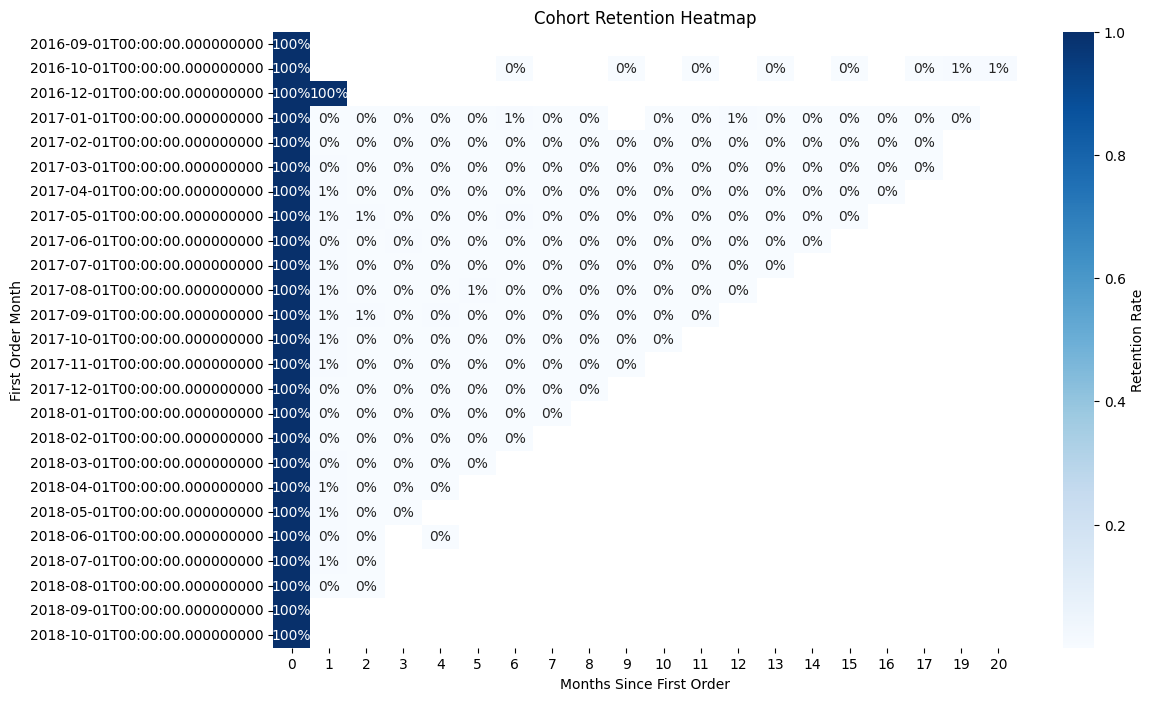

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cohort b√ºy√ºkl√ºklerini al
cohort_sizes = cohort_data.iloc[:, 0]

# 2. Retention oranlarƒ±nƒ± hesapla
cohort_retention = cohort_data.divide(cohort_sizes, axis=0)

# 3. Heatmap ile g√∂rselle≈ütir
plt.figure(figsize=(12, 8))
sns.heatmap(
    cohort_retention,
    annot=True,
    fmt=".0%",
    cmap="Blues",
    cbar_kws={'label': 'Retention Rate'}
)
plt.title('Cohort Retention Heatmap')
plt.ylabel('First Order Month')
plt.xlabel('Months Since First Order')
plt.yticks(rotation=0)
plt.show()


SONUC OLARAK
O tabloyu ve ardƒ±ndan √ºrettiƒüimiz ƒ±sƒ± haritasƒ±nƒ± olu≈üturmamƒ±zƒ±n amacƒ±, ‚Äúcohort retention‚Äù yani m√º≈üterilerin ilk sipari≈ü ayƒ±ndan itibaren zaman i√ßinde ne oranda halen aktif (yeni sipari≈ü veren) kaldƒ±klarƒ±nƒ± g√∂rmekti. √ñzetle:

Neden Cohort Analizi?

M√º≈üteriler, ilk sipari≈ülerini hangi ayda yapmƒ±≈ü? (√ñrneƒüin 2017‚Äì01 cohort‚Äôu)

O cohort‚Äôtaki m√º≈üteriler, sonraki aylar ne oranda geri d√∂n√ºp yeniden alƒ±≈üveri≈ü yapmƒ±≈ü?

Tabloda Ne Var?

Satƒ±rlar: ‚ÄúFirst Order Month‚Äù ‚Äî M√º≈üterinin ilk sipari≈ü ayƒ±.

S√ºtunlar: ‚Äúcohort_index‚Äù ‚Äî ƒ∞lk sipari≈üten sonraki 0, 1, 2‚Ä¶ aylar.

H√ºcreler: O kohorttaki m√º≈üteri sayƒ±sƒ± (√∂rneƒüin 2017‚Äì01 cohort‚Äôu ilk ayda 7.625 m√º≈üteri).

Isƒ± Haritasƒ±na D√∂n√º≈üt√ºrme

Her h√ºcreyi, o satƒ±rƒ±n (kohortun) 0. ayƒ±ndaki m√º≈üteri sayƒ±sƒ±na b√∂lerek y√ºzdeye √ßeviriyoruz (‚Äúretention rate‚Äù).

B√∂ylece 1. ayda ne kadar kayƒ±p olduƒüunu, zamanla retention‚Äôƒ±n nasƒ±l d√º≈üt√ºƒü√ºn√º net g√∂rebiliyoruz.

Ne √ñƒüreniyoruz?

Zamanla Sadakat Kaybƒ±: Genellikle her ay retention azalƒ±r; bu d√º≈ü√º≈ü√ºn dikliƒüi √∂nemlidir.

G√º√ßl√º Kohortlar: Bazƒ± d√∂nemlerde (√∂rneƒüin kampanya aylarƒ±nda) gelen m√º≈üteriler daha y√ºksek retention g√∂sterir.

ƒ∞yile≈ütirme Alanlarƒ±: Retention‚Äôƒ±n √ßok hƒ±zlƒ± d√º≈üt√ºƒü√º aylarƒ± tespit edip, o d√∂nemlerden gelen m√º≈üteriler i√ßin √∂zel ‚Äúte≈üvik‚Äù veya ‚Äúhatƒ±rlatma‚Äù kampanyalarƒ± planlayabiliriz.

Bu analiz, uzun vadeli m√º≈üteri sadakatini ve pazarlama etkinliklerinin geri d√∂n√º≈ü√ºn√º anlamak i√ßin kritik bir g√∂rseldir.

--------------------------------------
 R-F Segmentasyonu (Basit)
Ama√ß:

Recency: Her m√º≈üterinin son sipari≈üinden bu yana ge√ßen g√ºn sayƒ±sƒ±

Frequency: Her m√º≈üteri i√ßin toplam sipari≈ü sayƒ±sƒ±

In [136]:
import pandas as pd

# 1. Analiz g√ºn√º (√∂r. en son verideki tarih +1)
snapshot_date = df_orders['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# 2. Recency‚ÄìFrequency hesaplama
rf = (
    df_orders
      .groupby('customer_unique_id')
      .agg(last_purchase=('order_purchase_timestamp','max'),
           frequency=('order_id','nunique'))
      .reset_index()
)
rf['recency_days'] = (snapshot_date - rf['last_purchase']).dt.days

print(rf.head())
# rf veri √ßer√ßevesini scatterplot ile: x=recency_days, y=frequency


                 customer_unique_id       last_purchase  frequency  \
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27          1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27          1   
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03          1   
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41          1   
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42          1   

   recency_days  
0           161  
1           164  
2           586  
3           370  
4           337  


In [137]:
import pandas as pd

# √ñrnek segment tanƒ±mlarƒ±
def rf_segment(row):
    if row.recency_days <= 30 and row.frequency >= 5:
        return 'Champion'
    if row.recency_days <= 90 and row.frequency >= 3:
        return 'Loyal Customer'
    if row.recency_days <= 30 and row.frequency < 3:
        return 'Potential'
    if 90 < row.recency_days <= 180 and row.frequency >= 2:
        return 'At Risk'
    if row.recency_days > 180 and row.frequency == 1:
        return 'Hibernating'
    return 'Other'

# rf adƒ±ndaki DataFrame'ine yeni bir kolon ekle
rf['segment'] = rf.apply(rf_segment, axis=1)

# Segmentlere g√∂re ka√ß m√º≈üteri var bakalƒ±m
segment_counts = rf['segment'].value_counts().reset_index()
segment_counts.columns = ['segment', 'count']
print(segment_counts)


          segment  count
0     Hibernating  66327
1           Other  29087
2         At Risk    634
3  Loyal Customer     42
4       Potential      6


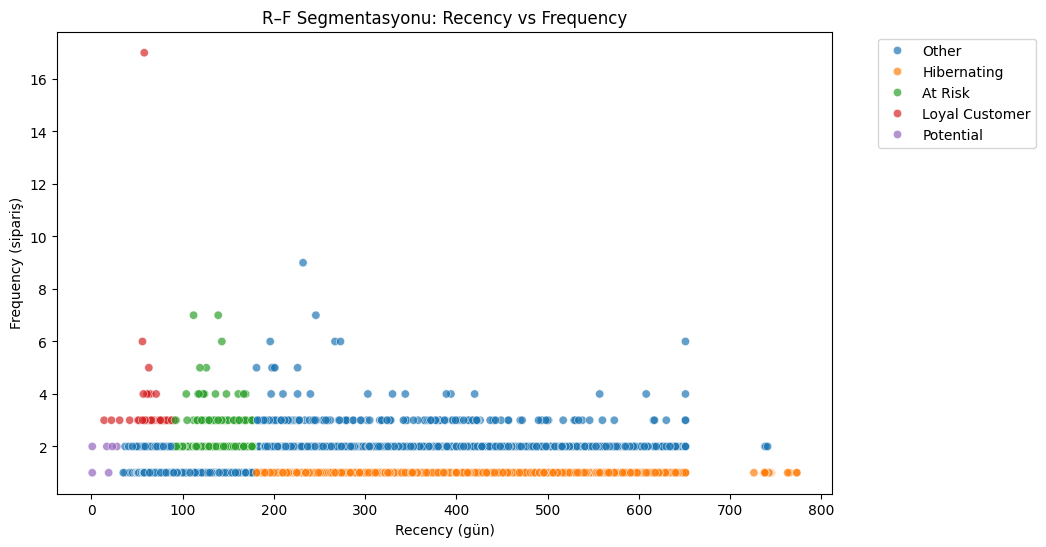

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rf,
    x='recency_days',
    y='frequency',
    hue='segment',
    palette='tab10',
    alpha=0.7
)
plt.title('R‚ÄìF Segmentasyonu: Recency vs Frequency')
plt.xlabel('Recency (g√ºn)')
plt.ylabel('Frequency (sipari≈ü)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Recency‚ÄìFrequency (R-F) Segmentasyonu √ñzeti

Elindeki rf tablosunda her satƒ±r bir unique m√º≈üteriyi temsil ediyor ve d√∂rt s√ºtun var:

customer_unique_id: M√º≈üteri kimliƒüi

last_purchase: O m√º≈üterinin en son sipari≈ü tarihi

frequency: Toplam sipari≈ü sayƒ±sƒ±

recency_days: Analiz tarihinden (snapshot_date) bu yana ge√ßen g√ºn sayƒ±sƒ±

1. R-F Segmentasyonunun Amacƒ±
Recency (yenilik): ‚ÄúNe kadar yakƒ±n zamanda‚Äù alƒ±≈üveri≈ü yapƒ±lmƒ±≈ü? (d√º≈ü√ºk sayƒ± = yakƒ±n zamanda)

Frequency (sƒ±klƒ±k): ‚ÄúKa√ß kere‚Äù alƒ±≈üveri≈ü yapƒ±lmƒ±≈ü? (y√ºksek sayƒ± = sadƒ±k)

Bu iki metriƒüi kullanarak m√º≈üterileri davranƒ±≈ülarƒ±na g√∂re segmentlere ayƒ±rƒ±rƒ±z. √ñrneƒüin:

Segment	Recency (g√ºn)	Frequency (sipari≈ü)
Champions	√áok d√º≈ü√ºk (√∂r. ‚â§30 g√ºn)	√áok y√ºksek (‚â•5)
Loyal Customers	Orta (31‚Äì90 g√ºn)	Y√ºksek (3‚Äì4)
Potential	Yakƒ±n (‚â§30 g√ºn)	D√º≈ü√ºk (1‚Äì2)
At Risk	Y√ºksek (91‚Äì180 g√ºn)	Orta (2‚Äì3)
Hibernating	√áok y√ºksek (>180 g√ºn)	D√º≈ü√ºk (1)

Bu grafik:

Sol √ºst: ‚ÄúChampion‚Äù (yakƒ±n zamanda, sƒ±k alƒ±≈üveri≈ü)

Saƒü alt: ‚ÄúHibernating‚Äù (uzun s√ºredir alƒ±≈üveri≈ü yok, nadiren)

Aradaki b√∂lgeler diƒüer segmentleri g√∂sterir.

4. Elde Edeceƒüin ƒ∞√ßg√∂r√ºler
‚ÄúChampion‚Äù m√º≈üterilerini √∂zel kampanyalarla √∂d√ºllendirip kaybetmemek,

‚ÄúPotential‚Äù segmentine ilk tekrar sipari≈ülerini tetikleyecek motivasyonlar sunmak,

‚ÄúAt Risk‚Äù ve ‚ÄúHibernating‚Äù segmentine d√∂n√º≈ü√ºm oranƒ±nƒ± test eden yeniden kazanƒ±m kampanyalarƒ± d√ºzenlemek,

‚ÄúLoyal Customers‚Äù i√ßin √ßapraz satƒ±≈ü fƒ±rsatlarƒ± yaratmak.

B√∂ylece her segment i√ßin farklƒ± CRM ve pazarlama stratejileri geli≈ütirebilirsin.

---------------------------------------------------------------
Yeni vs. Tekrar Eden M√º≈üteriler Oranƒ±
Ama√ß: Her ay gelen sipari≈ülerin ne kadarƒ±nƒ±n yeni m√º≈üterilerden, ne kadarƒ±nƒ±n tekrar edenlerden geldiƒüini g√∂rmek.

In [ ]:
# Her m√º≈üterinin ka√ß sipari≈üi var?
orders_per_customer = df_orders.groupby('customer_id')['order_id'].nunique()

# Ortalama sipari≈ü sayƒ±sƒ±
print("M√º≈üteri ba≈üƒ±na ortalama sipari≈ü sayƒ±sƒ±:", orders_per_customer.mean())

# Ka√ß m√º≈üteri 1'den fazla sipari≈ü vermi≈ü?
print("Birden fazla sipari≈ü veren m√º≈üteri sayƒ±sƒ±:", (orders_per_customer > 1).sum())

# Toplam m√º≈üteri sayƒ±sƒ±
print("Toplam m√º≈üteri sayƒ±sƒ± (sipari≈ü veren):", orders_per_customer.count())


M√º≈üteri ba≈üƒ±na ortalama sipari≈ü sayƒ±sƒ±: 1.0
Birden fazla sipari≈ü veren m√º≈üteri sayƒ±sƒ±: 0
Toplam m√º≈üteri sayƒ±sƒ± (sipari≈ü veren): 99441


In [142]:
# 1. Her unique m√º≈üteri i√ßin ilk sipari≈ü zamanƒ±nƒ± bul
first_order = df_orders.groupby('customer_unique_id')['order_purchase_timestamp'].min()

# 2. is_new s√ºtununu olu≈ütur (Boolean)
df_orders['is_new'] = df_orders['customer_unique_id'].map(first_order) == df_orders['order_purchase_timestamp']

# 3. Etiketli bir s√ºtun ekle
df_orders['customer_type'] = df_orders['is_new'].map({True: 'Yeni', False: 'Tekrar Eden'})

# 4. Aylƒ±k Yeni/Tekrar Eden sipari≈ü sayƒ±larƒ± ‚Äì burada artƒ±k customer_type kullanƒ±yoruz
new_returning_labeled = (
    df_orders
      .groupby([df_orders['order_month'], 'customer_type'])
      .agg(orders=('order_id', 'nunique'))
      .reset_index()
      .pivot(index='order_month', columns='customer_type', values='orders')
)

print(new_returning_labeled)


customer_type  Tekrar Eden    Yeni
order_month                       
2016-09-01             NaN     4.0
2016-10-01             3.0   321.0
2016-12-01             NaN     1.0
2017-01-01            29.0   771.0
2017-02-01            25.0  1755.0
2017-03-01            40.0  2642.0
2017-04-01            46.0  2358.0
2017-05-01            87.0  3613.0
2017-06-01            97.0  3148.0
2017-07-01           114.0  3912.0
2017-08-01           127.0  4204.0
2017-09-01           139.0  4146.0
2017-10-01           149.0  4482.0
2017-11-01           215.0  7329.0
2017-12-01           169.0  5504.0
2018-01-01           225.0  7044.0
2018-02-01           250.0  6478.0
2018-03-01           225.0  6986.0
2018-04-01           219.0  6720.0
2018-05-01           247.0  6626.0
2018-06-01           215.0  5952.0
2018-07-01           196.0  6096.0
2018-08-01           236.0  6276.0
2018-09-01            11.0     5.0
2018-10-01             3.0     1.0


Ne √ñƒüreniyoruz?
Yeni vs. Tekrar Eden Dengesi

2017 Kasƒ±m‚ÄìOcak d√∂neminde ayda ~200‚Äì250 yeni m√º≈üteri alƒ±rken, ~6 000‚Äì7 500 sipari≈üi ‚Äútekrar eden‚Äù m√º≈üterilerden almƒ±≈üƒ±z.

Bu da, platformun bir kez sipari≈ü veren m√º≈üterileri ba≈üarƒ±yla tekrar sipari≈ü vermeye ikna ettiƒüini g√∂steriyor.

Yeni M√º≈üteri Eƒüilimi

Yeni m√º≈üteri kazanƒ±mƒ± ilk aylarda (2016 Ekim‚Äôden ba≈ülayarak) hƒ±zla artmƒ±≈ü, 2017 ortalarƒ±na kadar aylƒ±k 100‚Äì200 civarƒ±nda ‚Äúilk sipari≈ü‚Äù almƒ±≈üƒ±z.

Ardƒ±ndan bu rakam sabitlenmi≈ü gibi g√∂r√ºn√ºyor: 2017‚Äì2018 boyunca her ay ortalama 200 yeni m√º≈üteri.

Tekrar Eden M√º≈üteri Yoƒüunluƒüu

Platform, ‚Äútekrar eden‚Äù m√º≈üterilerden gelen sipari≈üler bakƒ±mƒ±ndan Yeni m√º≈üterilere oranla 30‚Äì40 kat daha g√º√ßl√º.

Yani eldeki m√º≈üteri tabanƒ± sadakatli ve sipari≈ü sayƒ±larƒ± y√ºksek.

Sona Yakƒ±n D√º≈ü√º≈ü

2018 Eyl√ºl‚ÄìEkim‚Äôde hem yeni hem tekrar eden sayƒ±larƒ± √ßok d√º≈ü√ºk, b√ºy√ºk ihtimalle veri kesiti sona eri≈ütiƒüi i√ßin (veri toplama d√∂nemi sonu).

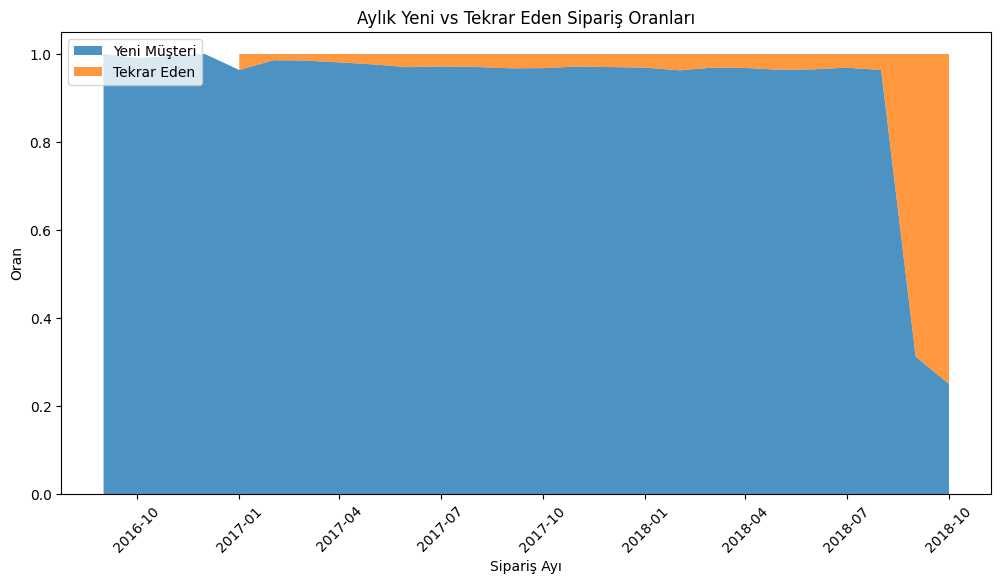

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# pivot_df: elimizdeki yeni vs tekrar eden pivot tablosu
pivot_df = new_returning.copy()  # index=order_month, columns=[False, True]

# Oranlarƒ± hesapla
pivot_pct = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Grafik
plt.figure(figsize=(12,6))
plt.stackplot(
    pivot_pct.index,
    pivot_pct[True], pivot_pct[False],
    labels=['Yeni M√º≈üteri','Tekrar Eden'], alpha=0.8
)
plt.legend(loc='upper left')
plt.title('Aylƒ±k Yeni vs Tekrar Eden Sipari≈ü Oranlarƒ±')
plt.xlabel('Sipari≈ü Ayƒ±')
plt.ylabel('Oran')
plt.xticks(rotation=45)
plt.show()


Aksiyon ƒ∞√ßin ƒ∞√ßg√∂r√ºler
Yeni m√º≈üteri kazanƒ±mƒ±nƒ±n sabit seyretmesi, pazarlama kanallarƒ±nƒ±zƒ±n doygunluƒüa ula≈ütƒ±ƒüƒ±nƒ± g√∂sterebilir. Yeni m√º≈üteri trafiƒüini artƒ±rmak i√ßin:

Referans programlarƒ±,

Dijital reklam b√ºt√ßesinin yeniden daƒüƒ±lƒ±mƒ±,

√ñzel ilk sipari≈ü kuponlarƒ±
gibi y√∂ntemler deƒüerlendirilebilir.

Tekrar eden m√º≈üterilerin hakimiyeti, mevcut m√º≈üteri tabanƒ±ndan maksimum deƒüeri almanƒ±z a√ßƒ±sƒ±ndan pozitif. Bunu daha da g√º√ßlendirmek i√ßin:

Sadakat programƒ± veya kademeli indirim (√∂rneƒüin 3., 5. sipari≈üe √∂zel)

Cross-sell / Up-sell kampanyalarƒ± (sepete tamamlayƒ±cƒ± √ºr√ºn √∂nerileri)

D√∂nemine √∂zg√º y√ºkseli≈üleri (2017 Kasƒ±m‚ÄìOcak zirveleri) ‚ÄúBlack Friday‚Äù ve ‚Äúyƒ±lba≈üƒ±‚Äù d√∂nemine denk geliyor.

Bu kampanya etkilerini tekrarlamak i√ßin bu d√∂nemlerde benzer veya yeni promosyonlar planlanabilir.

---------------------------------------------------------------
Bir Sonraki Adƒ±mda Yapabileceklerimiz (Modelleme √ñncesi Ek Analizler)
Inter-purchase Time Daƒüƒ±lƒ±mƒ±: M√º≈üterinin ilk ve ikinci sipari≈üleri arasƒ±ndaki s√ºre histogramƒ±

√úr√ºn/Sepet Analizleri: Kategori bazlƒ± satƒ±≈ü grafikleri, ortalama sepet deƒüeri boxplot‚Äôƒ±

Coƒürafi Heatmap‚Äôler: ≈ûehir/eyalet bazlƒ± choropleth veya bubble map

Detaylƒ± Mevsimsel Ayrƒ±≈üƒ±m: Aylƒ±k hareketli ortalama ve sezon-dekompozisyon grafikleri

Kohort Bazlƒ± Segment Ayrƒ±ntƒ±sƒ±: Se√ßili b√ºy√ºk ≈üehirlerde kohort retention kar≈üƒ±la≈ütƒ±rmasƒ±

Modelleme a≈üamasƒ±na ge√ßmeden √∂nce bu g√∂rsel analizler, hem veri kalitesini teyit eder hem de hangi deƒüi≈ükenlerin modele alƒ±nacaƒüƒ±na rehberlik eder. ƒ∞stersen bunlardan birini se√ßip derinle≈ütirelim ya da yeni bir dosyada doƒürudan model eƒüitimine ge√ßebiliriz!

-----------------------------

df_items

üßæ df_items S√ºtunlarƒ± A√ßƒ±klamasƒ±
S√ºtun Adƒ±	  A√ßƒ±klama 
order_id	= Sipari≈üin ID‚Äôsi (bir sipari≈üin birden fazla √ºr√ºn√º olabilir)
order_item_id	= Sipari≈üin i√ßindeki √ºr√ºn sƒ±rasƒ± (1, 2, 3...)
product_id =	Satƒ±n alƒ±nan √ºr√ºn√ºn benzersiz ID‚Äôsi
seller_id	= √úr√ºn√º satan satƒ±cƒ±nƒ±n ID‚Äôsi
shipping_limit_date	 = Kargoya verilmesi gereken son tarih
price	=  √úr√ºn√ºn satƒ±≈ü fiyatƒ±
freight_value  =	Kargo √ºcreti

In [144]:
df_items.head()


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [145]:
df_items.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


1. Sipari≈ü Ba≈üƒ±na Ortalama √ºr√ºn Sayƒ±sƒ±

In [146]:
order_item_count = df_items.groupby('order_id')['order_item_id'].count()
print("Sipari≈ü ba≈üƒ±na ortalama √ºr√ºn sayƒ±sƒ±:", round(order_item_count.mean(), 2))


Sipari≈ü ba≈üƒ±na ortalama √ºr√ºn sayƒ±sƒ±: 1.14


 2. Sipari≈ü Ba≈üƒ±na Ortalama Tutar (√úr√ºn + Kargo)

In [147]:
order_totals = df_items.groupby('order_id').agg({
    'price': 'sum',
    'freight_value': 'sum'
}).reset_index()

order_totals['order_total'] = order_totals['price'] + order_totals['freight_value']
print(order_totals[['price', 'freight_value', 'order_total']].describe())


              price  freight_value   order_total
count  98666.000000   98666.000000  98666.000000
mean     137.754076      22.823562    160.577638
std      210.645145      21.650909    220.466087
min        0.850000       0.000000      9.590000
25%       45.900000      13.850000     61.980000
50%       86.900000      17.170000    105.290000
75%      149.900000      24.040000    176.870000
max    13440.000000    1794.960000  13664.080000


3. En √áok Satƒ±lan √úr√ºnler (Top 10)

In [148]:
top_products = (
    df_items.groupby('product_id')
    .agg(sales_count=('order_item_id', 'count'),
         total_revenue=('price', 'sum'))
    .sort_values(by='sales_count', ascending=False)
    .head(10)
)
print(top_products)


                                  sales_count  total_revenue
product_id                                                  
aca2eb7d00ea1a7b8ebd4e68314663af          527       37608.90
99a4788cb24856965c36a24e339b6058          488       43025.56
422879e10f46682990de24d770e7f83d          484       26577.22
389d119b48cf3043d311335e499d9c6b          392       21440.59
368c6c730842d78016ad823897a372db          388       21056.80
53759a2ecddad2bb87a079a1f1519f73          373       20387.20
d1c427060a0f73f6b889a5c7c61f2ac4          343       47214.51
53b36df67ebb7c41585e8d54d6772e08          323       37683.42
154e7e31ebfa092203795c972e5804a6          281        6325.19
3dd2a17168ec895c781a9191c1e95ad7          274       41082.60


4. Ortalama Kargo √úcreti

In [149]:
print("Ortalama kargo √ºcreti:", round(df_items['freight_value'].mean(), 2))


Ortalama kargo √ºcreti: 19.99


√ºr√ºn fiyat dagƒ±lƒ±mƒ±

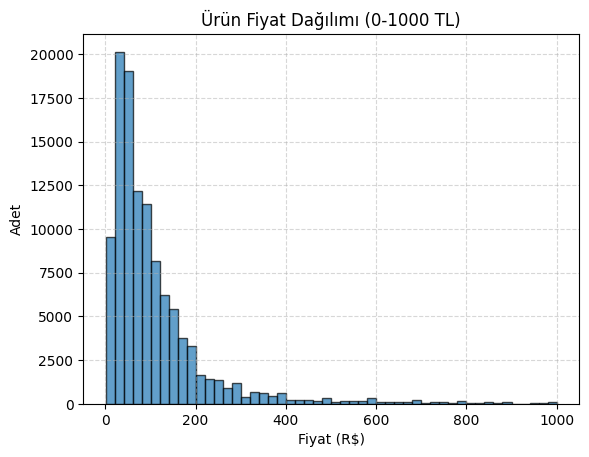

In [157]:
df_items[df_items['price'] <= 1000]['price'].plot.hist(bins=50, edgecolor='black', alpha=0.7)
plt.title("√úr√ºn Fiyat Daƒüƒ±lƒ±mƒ± (0-1000 TL)")
plt.xlabel("Fiyat (R$)")
plt.ylabel("Adet")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Analiz ‚Äì √úr√ºn Fiyat Daƒüƒ±lƒ±mƒ± (0‚Äì1000 TL)
Yoƒüunluk 0‚Äì200 TL Arasƒ±nda:

Grafikte a√ßƒ±k ≈üekilde g√∂r√ºld√ºƒü√º √ºzere, √ºr√ºnlerin b√ºy√ºk √ßoƒüunluƒüu 0‚Äì200 TL bandƒ±nda toplanmƒ±≈ü.

√ñzellikle 50‚Äì100 TL arasƒ± bariz bir tepe noktasƒ± olu≈üturmu≈ü. Bu segmentte y√ºksek satƒ±≈ü potansiyeli olduƒüu a√ßƒ±k.

200‚Äì400 TL Arasƒ±:

Satƒ±≈ü adetleri kademeli olarak d√º≈üse de h√¢l√¢ anlamlƒ± bir hacim var.

Bu bantta daha y√ºksek k√¢r marjƒ± saƒülanabilir, √ß√ºnk√º sepet deƒüeri artƒ±yor.

400 TL √úst√º:

√úr√ºn sayƒ±sƒ±/satƒ±≈ü hacmi ciddi ≈üekilde azalƒ±yor.

Bu aralƒ±k daha ‚Äúni≈ü‚Äù √ºr√ºnlerin bulunduƒüu alan olabilir.

Alƒ±cƒ± sayƒ±sƒ± az ama birim k√¢r y√ºksek olabilir.

üìå Sonu√ßlar & Aksiyon √ñnerileri
‚úÖ 1. D√º≈ü√ºk Fiyatlƒ± Segment (0‚Äì200 TL)
Yoƒüun rekabet ve y√ºksek talep var.

Bu aralƒ±ktaki √ºr√ºnler:

Kampanyalar i√ßin uygun.

Sepet artƒ±rƒ±cƒ± "tamamlayƒ±cƒ± √ºr√ºnler" olarak kullanƒ±labilir.

Paketleme/√ßapraz satƒ±≈ü stratejileri i√ßin temel √ºr√ºn olabilir.

‚úÖ 2. Orta Segment (200‚Äì400 TL)
Dengeli bir segment: Ne √ßok ucuz ne de fazla ni≈ü.

Marj & hacim dengesine sahip.

Bu segmentte √∂zel kampanyalar, kargo bedava teklifleri etkili olabilir.

‚ö†Ô∏è 3. Y√ºksek Fiyatlƒ± Segment (400‚Äì1000 TL)
Alƒ±cƒ± kitlesi daha dar.

√úr√ºnlerin anlatƒ±mƒ±, sunumu, g√ºven yaratƒ±cƒ± unsurlar (yorumlar, videolar) daha √∂nemli hale gelir.

Bu √ºr√ºnler i√ßin reklam hedeflemesi daha se√ßici yapƒ±lmalƒ±.

üéØ Stratejik √ñneri
0‚Äì200 TL i√ßin: Talep y√ºksek ‚Üí Hacim odaklƒ± strateji, hƒ±zlƒ± d√∂ng√º, kampanyalƒ± satƒ±≈ü.

200‚Äì400 TL i√ßin: Marj + hacim dengesi ‚Üí Kargo dahil fiyat, hediyeli satƒ±≈ü, reklamla destekleme.

400+ TL i√ßin: √ñne √ßƒ±karma + √ºr√ºn tanƒ±tƒ±mƒ± ‚Üí Video i√ßerikler, kullanƒ±cƒ± yorumlarƒ±, detaylƒ± a√ßƒ±klamalarla desteklenmeli.

ƒ∞stersen bu analizleri g√∂rsel infografik haline de getirebiliriz ya da sunumluk kƒ±sa √∂zetler ≈üeklinde toparlayabilirim. Nasƒ±l ilerleyelim?

--------------

7 üõçÔ∏è Satƒ±cƒ± Ba≈üƒ±na Ortalama Satƒ±≈ü Adedi ve Cirosu
Her satƒ±cƒ±nƒ±n ka√ß √ºr√ºn sattƒ±ƒüƒ±nƒ± ve toplam kazancƒ±nƒ± analiz et.

seller_id bazƒ±nda grupla: satƒ±lan √ºr√ºn sayƒ±sƒ±, toplam ciro (price)

Bu analiz ileride "en ba≈üarƒ±lƒ± satƒ±cƒ±lar kim?" sorusuna katkƒ± saƒülar.

In [158]:
# Satƒ±cƒ± bazƒ±nda toplam satƒ±≈ü adedi ve toplam ciro
seller_summary = df_items.groupby('seller_id').agg({
    'order_item_id': 'count',
    'price': 'sum'
}).rename(columns={'order_item_id': 'total_items_sold', 'price': 'total_revenue'})

# Ortalama satƒ±≈ü adedi ve ciro
avg_items_per_seller = seller_summary['total_items_sold'].mean()
avg_revenue_per_seller = seller_summary['total_revenue'].mean()

print("Satƒ±cƒ± ba≈üƒ±na ortalama satƒ±≈ü adedi:", round(avg_items_per_seller, 2))
print("Satƒ±cƒ± ba≈üƒ±na ortalama ciro:", round(avg_revenue_per_seller, 2))


Satƒ±cƒ± ba≈üƒ±na ortalama satƒ±≈ü adedi: 36.4
Satƒ±cƒ± ba≈üƒ±na ortalama ciro: 4391.48


Satƒ±cƒ± ba≈üƒ±na ortalama 36 √ºr√ºn satƒ±lƒ±yor.

Bu, satƒ±cƒ±larƒ±n b√ºy√ºk √ßoƒüunluƒüunun az sayƒ±da √ºr√ºn sattƒ±ƒüƒ±nƒ±; yani √ßok az sayƒ±da satƒ±cƒ±nƒ±n b√ºy√ºk hacimli satƒ±≈ü yaptƒ±ƒüƒ±nƒ± g√∂sterebilir. (Uzun kuyruk etkisi olabilir ‚Äî ileride "satƒ±cƒ±larƒ±n satƒ±≈ü daƒüƒ±lƒ±mƒ±nƒ±" histogramla incelemek faydalƒ± olur.)

Ortalama ciro 4391 TL civarƒ±nda.

Satƒ±cƒ±larƒ±n gelirleri b√ºy√ºk oranda √ºr√ºn fiyatlarƒ±na ve √ºr√ºn sayƒ±sƒ±na baƒülƒ±.

Bu deƒüer, platformun toplam gelirini tahmin etmek veya aktif satƒ±cƒ± ba≈üƒ±na performansƒ± kƒ±yaslamak i√ßin bir benchmark olabilir.

In [165]:
#1. Satƒ±cƒ± Ba≈üƒ±na Ortalama Kargo Geliri:
avg_freight_per_seller = df_items.groupby('seller_id')['freight_value'].sum().mean()
print("Satƒ±cƒ± ba≈üƒ±na ortalama kargo geliri:", round(avg_freight_per_seller, 2))


Satƒ±cƒ± ba≈üƒ±na ortalama kargo geliri: 727.6


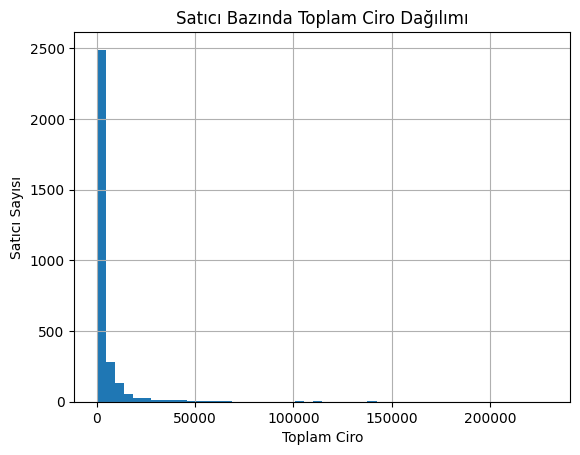

In [166]:
#2. Satƒ±cƒ± Performans Daƒüƒ±lƒ±mƒ± (Histogram)
df_items.groupby('seller_id')['price'].sum().hist(bins=50)
plt.title("Satƒ±cƒ± Bazƒ±nda Toplam Ciro Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Toplam Ciro")
plt.ylabel("Satƒ±cƒ± Sayƒ±sƒ±")
plt.show()

≈ûu Ana Kadar Ula≈ütƒ±ƒüƒ±mƒ±z Veriler:
‚úÖ Satƒ±cƒ± Ba≈üƒ±na Ortalama Deƒüerler:
Ortalama Satƒ±≈ü Adedi: 36.4 √ºr√ºn

Ortalama Ciro: 4391.48 TL

Ortalama Kargo Geliri: 727.6 TL

‚úÖ Satƒ±cƒ± Bazlƒ± Ciro Daƒüƒ±lƒ±mƒ± (Histogram):
Daƒüƒ±lƒ±m saƒüa √ßarpƒ±k (right-skewed)

B√ºy√ºk √ßoƒüunluk √ßok d√º≈ü√ºk ciro yaparken, √ßok az sayƒ±da satƒ±cƒ± y√ºksek ciro yapƒ±yor

Bu da platformda gelirlerin b√ºy√ºk bir kƒ±smƒ±nƒ±n azƒ±nlƒ±k bir satƒ±cƒ± grubunda yoƒüunla≈ütƒ±ƒüƒ±nƒ± g√∂steriyor (klasik Pareto 80/20 kuralƒ±)

üîç ≈ûimdi Ne Yapabiliriz?
ƒ∞stersen, sƒ±radaki mantƒ±klƒ± analiz adƒ±mlarƒ±ndan birini se√ßebiliriz:

üéØ Yeni Analiz √ñnerileri:
√úr√ºn Bazƒ±nda Ortalama Kargo √úcreti ve Ortalama Fiyat
(Hangi √ºr√ºn gruplarƒ± pahalƒ±? Hangileri y√ºksek kargo bedeli yaratƒ±yor?)

En Y√ºksek Ciro Yapan Satƒ±cƒ±lar (Top 10)
(Satƒ±cƒ± ismi yok ama seller_id √ºzerinden sƒ±ralayabiliriz.)

Kargo √úcreti vs. √úr√ºn Fiyatƒ± ƒ∞li≈ükisi
(Scatter plot ile √ºr√ºn fiyatƒ± arttƒ±k√ßa kargo √ºcreti de artƒ±yor mu inceleyebiliriz.)

Aynƒ± Sipari≈üteki Ortalama √úr√ºn Sayƒ±sƒ± ve Fiyatlar
(order_id bazƒ±nda price ve order_item_id √ºzerinden)

----------

8. üß∫ √úr√ºnler Bazƒ±nda Ortalama Kargo √úcreti ve Fiyat
product_id bazƒ±nda:

Ortalama fiyat

Ortalama freight_value

Fiyatƒ± y√ºksek olan √ºr√ºnler daha mƒ± fazla kargo √ºcreti alƒ±yor? gibi ili≈ükilere bak.

In [159]:
product_summary = df_items.groupby('product_id').agg({
    'price': 'mean',
    'freight_value': 'mean'
}).rename(columns={
    'price': 'avg_price',
    'freight_value': 'avg_freight'
})

product_summary = product_summary.sort_values(by='avg_price', ascending=False).head(10)
print(product_summary)


                                  avg_price  avg_freight
product_id                                              
489ae2aa008f021502940f251d4cce7f    6735.00       194.31
69c590f7ffc7bf8db97190b6cb6ed62e    6729.00       193.21
1bdf5e6731585cf01aa8169c7028d6ad    6499.00       227.66
a6492cc69376c469ab6f61d8f44de961    4799.00       151.34
c3ed642d592594bb648ff4a04cee2747    4690.00        74.34
259037a6a41845e455183f89c5035f18    4590.00        91.78
a1beef8f3992dbd4cd8726796aa69c53    4399.87       113.45
6cdf8fc1d741c76586d8b6b15e9eef30    4099.99        75.27
6902c1962dd19d540807d0ab8fade5c6    3999.90        17.01
4ca7b91a31637bd24fb8e559d5e015e4    3999.00       195.76


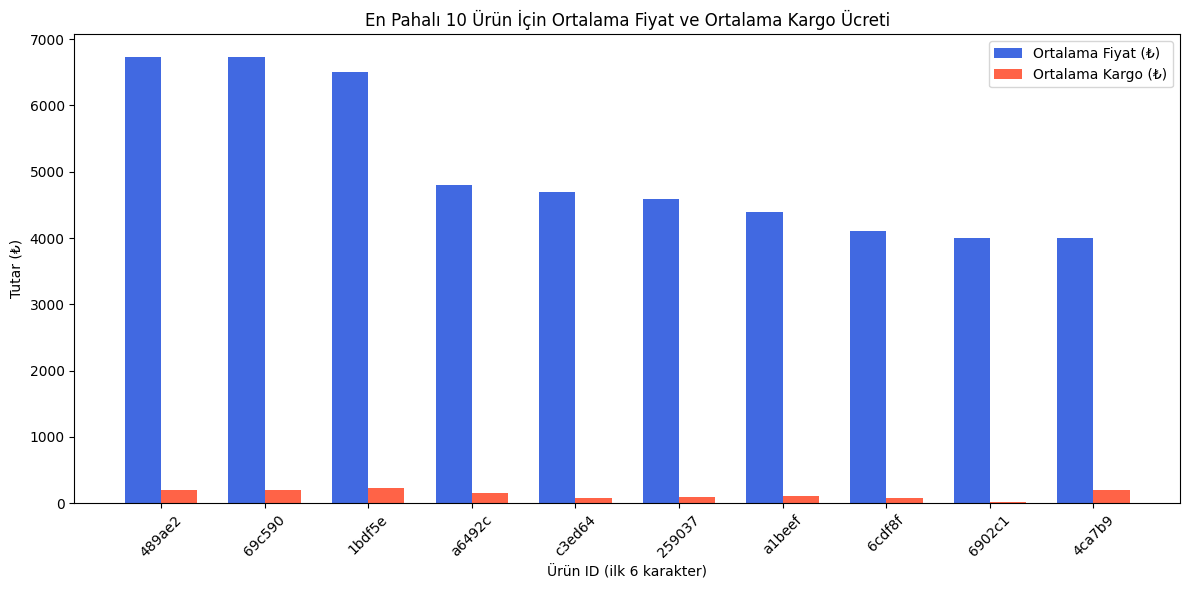

In [167]:
# √úr√ºn ID'lerini kƒ±saltalƒ±m g√∂rsellik i√ßin (gerekirse t√ºm ID'yi kullanabilirsin)
product_summary['product_short'] = product_summary.index.str[:6]

# X ekseni i√ßin konum dizisi
x = np.arange(len(product_summary))
width = 0.35  # √ßubuk geni≈üliƒüi

# Grafik √ßizimi
fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, product_summary['avg_price'], width, label='Ortalama Fiyat (‚Ç∫)', color='royalblue')
bars2 = ax.bar(x + width/2, product_summary['avg_freight'], width, label='Ortalama Kargo (‚Ç∫)', color='tomato')

# Eksen ve ba≈ülƒ±k ayarlarƒ±
ax.set_xlabel('√úr√ºn ID (ilk 6 karakter)')
ax.set_ylabel('Tutar (‚Ç∫)')
ax.set_title('En Pahalƒ± 10 √úr√ºn ƒ∞√ßin Ortalama Fiyat ve Ortalama Kargo √úcreti')
ax.set_xticks(x)
ax.set_xticklabels(product_summary['product_short'], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


Bu √ºr√ºnler b√ºy√ºk ihtimalle y√ºksek fiyatlƒ± elektronik veya ev e≈üyalarƒ± gibi √ºr√ºn gruplarƒ± olabilir.

Kargo √ºcretleri fiyatla doƒüru orantƒ±lƒ± deƒüil ‚Üí √ñrneƒüin:
3999.90 ‚Ç∫ olan √ºr√ºn√ºn kargo √ºcreti yalnƒ±zca 17.01 ‚Ç∫
Bu durum ya kampanya, ya da √ºr√ºn√ºn boyut/aƒüƒ±rlƒ±k farkƒ±ndan kaynaklanabilir.

En y√ºksek fiyatlƒ± √ºr√ºnlerin kargo bedeli ortalamada 100‚Äì200 TL bandƒ±nda, bu da toplam maliyeti √∂nemli √∂l√ß√ºde artƒ±rƒ±yor.

------

9. üõí √úr√ºn √áe≈üitliliƒüi
Her order_id i√ßinde ka√ß farklƒ± product_id var?

Aynƒ± sipari≈üte aynƒ± √ºr√ºn√ºn birden fazla adedi mi alƒ±nmƒ±≈ü, farklƒ± √ºr√ºnler mi?

Ortalama farklƒ± √ºr√ºn sayƒ±sƒ± (her sipari≈üte): 1.04


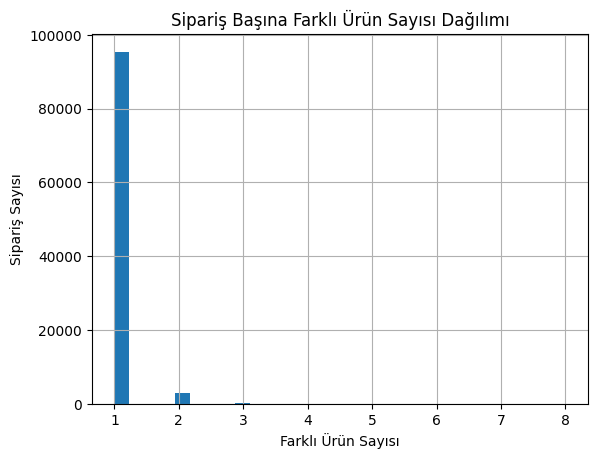

In [160]:
unique_products_per_order = df_items.groupby('order_id')['product_id'].nunique()

print("Ortalama farklƒ± √ºr√ºn sayƒ±sƒ± (her sipari≈üte):", round(unique_products_per_order.mean(), 2))

# Histogram √ßizmek i√ßin:
import matplotlib.pyplot as plt
unique_products_per_order.hist(bins=30)
plt.title("Sipari≈ü Ba≈üƒ±na Farklƒ± √úr√ºn Sayƒ±sƒ± Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Farklƒ± √úr√ºn Sayƒ±sƒ±")
plt.ylabel("Sipari≈ü Sayƒ±sƒ±")
plt.show()


Analiz Sonucu:
Ortalama farklƒ± √ºr√ºn sayƒ±sƒ± (her sipari≈üte): 1.04

üìä Yorum:
D√º≈ü√ºk √úr√ºn √áe≈üitliliƒüi:

Her sipari≈üte ortalama yalnƒ±zca 1.04 farklƒ± √ºr√ºn satƒ±n alƒ±nmƒ±≈ü. Bu, m√º≈üterilerin neredeyse her sipari≈üte yalnƒ±zca bir t√ºr √ºr√ºn aldƒ±ƒüƒ± anlamƒ±na gelir.

M√º≈üteri alƒ±≈üveri≈ü davranƒ±≈üƒ±, √ße≈üitli √ºr√ºnleri aynƒ± anda satƒ±n alma eƒüiliminde olmadƒ±ƒüƒ±nƒ± g√∂steriyor.

Tek √úr√ºnden √áoklu Alƒ±m Olasƒ±lƒ±ƒüƒ±:

Aynƒ± √ºr√ºn√ºn birden fazla adetinin alƒ±nmasƒ±, yani miktar artƒ±≈üƒ± ile sepet b√ºy√ºt√ºlmesi s√∂z konusu olabilir.

Bu, √∂zellikle stok yapan ya da aynƒ± √ºr√ºn√º tekrar eden ihtiya√ßlar i√ßin alan m√º≈üterilere i≈üaret eder.

√áapraz Satƒ±≈ü Fƒ±rsatlarƒ±:

Sepetlerde √ºr√ºn √ße≈üitliliƒüi √ßok d√º≈ü√ºk olduƒüu i√ßin, √ßapraz satƒ±≈ü stratejileri geli≈ütirilebilir.

√ñrneƒüin: "Bu √ºr√ºn√º alanlar ≈üunu da aldƒ±" √∂nerileriyle kullanƒ±cƒ±lar y√∂nlendirilebilir.

Kategori veya √úr√ºn Bazlƒ± ƒ∞nceleme Gerekebilir:

Bu davranƒ±≈ü belli √ºr√ºn gruplarƒ±nda daha yoƒüun olabilir. ƒ∞leride analizleri √ºr√ºn kategorileriyle birle≈ütirirsen bu eƒüilimin daha √ßok hangi kategoride olduƒüunu g√∂rebilirsin.

Sepet Analizi ile Desteklenebilir:

Bu veriye bakarak, her sipari≈üte ka√ß farklƒ± kategori, ka√ß adet √ºr√ºn, hangi √ºr√ºnlerin birlikte satƒ±ldƒ±ƒüƒ± gibi daha derin analizler yapƒ±labilir.

‚úÖ Sonu√ß:
Olist m√º≈üterileri √ßoƒüunlukla bir sipari≈üte sadece tek bir √ºr√ºn t√ºr√º satƒ±n alƒ±yor. Bu da, alƒ±≈üveri≈ülerin olduk√ßa odaklƒ± olduƒüunu g√∂steriyor. Sepet b√ºy√ºkl√ºƒü√ºn√º artƒ±rmak i√ßin √∂neri sistemleri ve paket teklifleri gibi stratejiler geli≈ütirmek mantƒ±klƒ± olur.

ƒ∞stersen bu analizi kategori bazlƒ± da derinle≈ütirebiliriz. √ñrneƒüin: Hangi √ºr√ºn kategorilerinde daha √ßok √ße≈üitlilik var? Bu, pazarlama stratejileri a√ßƒ±sƒ±ndan √ßok deƒüerli olur.

---

10. üí∏ Kargo √úcreti / √úr√ºn Fiyatƒ± Oranƒ±
freight_value / price oranƒ±nƒ± hesapla.

Bu oran √ßok y√ºksek olan √ºr√ºnler kimde? Bu m√º≈üteri memnuniyetini etkileyebilir.

Grafiƒüini √ßizip outlier √ºr√ºnleri tespit edebilirsin.



In [161]:
df_items['freight_to_price_ratio'] = df_items['freight_value'] / df_items['price']
df_items['freight_to_price_ratio'] = df_items['freight_to_price_ratio'].replace([float('inf'), -float('inf')], None)

# Ortalama oran
print("Ortalama kargo/√ºr√ºn fiyat oranƒ±:", round(df_items['freight_to_price_ratio'].mean(), 2))

# En y√ºksek oranlƒ± 10 √ºr√ºn
top_ratios = df_items.sort_values(by='freight_to_price_ratio', ascending=False).head(10)
print(top_ratios[['order_id', 'product_id', 'price', 'freight_value', 'freight_to_price_ratio']])


Ortalama kargo/√ºr√ºn fiyat oranƒ±: 0.32
                                order_id                        product_id  \
87081   c5bdd8ef3c0ec420232e668302179113  8a3254bee785a526d548a81a9bc3c9be   
48625   6e864b3f0ec71031117ad4cf46b7f2a1  8a3254bee785a526d548a81a9bc3c9be   
27652   3ee6513ae7ea23bdfab5b9ab60bffcb5  8a3254bee785a526d548a81a9bc3c9be   
110535  fb265b2dc558a56445dfc48f8224e201  baf25ed4f8f70238cc87230379471454   
94495   d642656598ae928a250620315d19e87e  b07fffe072c9adc235a35d8da7c0584d   
57312   8272b63d03f5f79c56e9e4120aec44ef  270516a3f41dc035aa87d220228f844c   
57303   8272b63d03f5f79c56e9e4120aec44ef  05b515fdc76e888aada3c6d66c201dff   
57299   8272b63d03f5f79c56e9e4120aec44ef  05b515fdc76e888aada3c6d66c201dff   
57297   8272b63d03f5f79c56e9e4120aec44ef  270516a3f41dc035aa87d220228f844c   
57300   8272b63d03f5f79c56e9e4120aec44ef  05b515fdc76e888aada3c6d66c201dff   

        price  freight_value  freight_to_price_ratio  
87081    0.85          22.30               26

Analiz Sonucu:
Ortalama kargo/√ºr√ºn fiyat oranƒ±: 0.32

Bu, demek oluyor ki bir √ºr√ºn√ºn fiyatƒ±nƒ±n ortalama %32‚Äôsi kadar kargo √ºcreti √∂denmi≈ü.

üìä Yorum:
1. Oran Olduk√ßa Y√ºksek
Ortalama oran %32 gibi y√ºksek bir seviyede. Bu, √∂zellikle ucuz √ºr√ºnlerde kargo √ºcretinin m√º≈üteriyi caydƒ±rabilecek kadar y√ºksek olduƒüunu g√∂sterir.

√ñrneƒüin, listede bazƒ± √ºr√ºnlerin fiyatƒ± 0.85 TL iken kargo √ºcreti 22 TL'ye kadar √ßƒ±kƒ±yor (26 katƒ±!).

2. Uygunsuz Fiyat-Kargo Dengesi
D√º≈ü√ºk fiyatlƒ± √ºr√ºnlerde freight_to_price_ratio olduk√ßa y√ºksek. Bu da ‚Äúkargo maliyeti √ºr√ºn√ºn kendisinden pahalƒ±‚Äù durumu yaratƒ±yor.

Bu tarz √ºr√ºnler pazaryerinde daha az cazip hale gelebilir, terk edilmi≈ü sepet oranƒ±nƒ± artƒ±rabilir.

3. M√º≈üteri G√∂z√ºnden Bakarsak:
Bir m√º≈üteri 1 TL‚Äôlik √ºr√ºn alƒ±rken 7‚Äì20 TL kargo √∂d√ºyorsa bu olumsuz kullanƒ±cƒ± deneyimi yaratƒ±r.

Bu da hem m√º≈üteri sadakatini hem de genel satƒ±≈ü performansƒ±nƒ± d√º≈ü√ºrebilir.

4. Satƒ±cƒ± ve Platform ƒ∞√ßin Stratejik Alanlar:
Ucuz √ºr√ºnler i√ßin sabit veya indirimli kargo se√ßenekleri sunulabilir.

Belirli sepet tutarƒ± √ºzeri kargo bedava kampanyalarƒ± bu durumu dengeleyebilir.

Alternatif olarak, bu √ºr√ºnler √ßoklu alƒ±m te≈üvikiyle (√∂rneƒüin ‚Äú3 al 1 √∂de‚Äù) desteklenebilir.

5. Politika Geli≈ütirmek ƒ∞√ßin Kullanƒ±labilir:
Satƒ±cƒ±lar bazƒ±nda ortalama oran √ßƒ±karƒ±larak y√ºksek oranlƒ± satƒ±cƒ±lara √∂zel bilgilendirme ya da y√∂nlendirme yapƒ±labilir.

Ayrƒ±ca bu oranlara g√∂re √ºr√ºn-kargo fiyat e≈üle≈ümesi i√ßin kurallar geli≈ütirilebilir (√∂rneƒüin: oran 1'in √ºzerine √ßƒ±kmasƒ±n gibi).

‚úÖ Sonu√ß:
Yaptƒ±ƒüƒ±n bu analiz, platform karlƒ±lƒ±ƒüƒ±, m√º≈üteri deneyimi ve satƒ±≈ü stratejileri a√ßƒ±sƒ±ndan olduk√ßa kritik bir metrik ortaya koymu≈ü. Hem operasyonel hem pazarlama a√ßƒ±sƒ±ndan etkili kararlar alƒ±nabilir. Harika bir i√ßg√∂r√º!

ƒ∞stersen bunu kategori bazlƒ± oranlarla, ya da satƒ±cƒ± bazlƒ± kargo/√ºr√ºn fiyat oranƒ± ortalamasƒ±yla da derinle≈ütirebiliriz. B√∂ylece hangi kategoride/satƒ±cƒ±da sorun b√ºy√ºkse net ≈üekilde ortaya √ßƒ±kar. Yardƒ±mcƒ± olayƒ±m mƒ± bu konuda?

----


11. üìä Toplam Ciro Daƒüƒ±lƒ±mƒ±
price + freight_value √ºzerinden toplam tutar hesapla.

Bu tutarlarƒ±n daƒüƒ±lƒ±mƒ±nƒ± histogram/kutu grafiƒüi ile g√∂ster.

Satƒ±n alƒ±nan √ºr√ºnlerin % ka√ßlƒ±k kƒ±smƒ± toplam cironun % ka√ßƒ±nƒ± getiriyor? (Pareto analizi - 80/20)

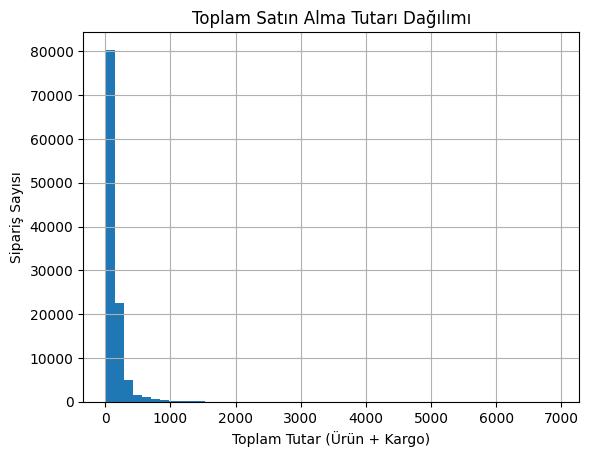

Ciroya katkƒ± saƒülayan %20 √ºr√ºn sayƒ±sƒ±: 9252


In [162]:
df_items['total_value'] = df_items['price'] + df_items['freight_value']

# Histogram
df_items['total_value'].hist(bins=50)
plt.title("Toplam Satƒ±n Alma Tutarƒ± Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Toplam Tutar (√úr√ºn + Kargo)")
plt.ylabel("Sipari≈ü Sayƒ±sƒ±")
plt.show()

# Pareto analizi (top %20 √ºr√ºn ne kadar ciro getiriyor?)
sorted_revenue = df_items.groupby('product_id')['total_value'].sum().sort_values(ascending=False)
cumulative_share = sorted_revenue.cumsum() / sorted_revenue.sum()

top_20_percent = cumulative_share[cumulative_share <= 0.8]
print("Ciroya katkƒ± saƒülayan %20 √ºr√ºn sayƒ±sƒ±:", len(top_20_percent))


Analiz Sonucu:
Ciroya katkƒ± saƒülayan %20 √ºr√ºn sayƒ±sƒ±: 9.252

üß† Yorum:
1. Pareto ƒ∞lkesi Doƒürulanmamƒ±≈ü
Pareto‚Äôya g√∂re genellikle satƒ±≈ülarƒ±n %80‚Äôi, √ºr√ºnlerin %20‚Äôsinden gelir.

Ancak burada %80'lik ciroyu saƒülamak i√ßin 9.252 farklƒ± √ºr√ºn gerekiyor.

Bu, √ºr√ºn √ße≈üitliliƒüinin √ßok geni≈ü, ancak satƒ±≈ülarƒ±n √ßok daƒüƒ±nƒ±k olduƒüunu g√∂steriyor.

2. Uzun Kuyruk (Long Tail) Etkisi
√áok sayƒ±da √ºr√ºn k√º√ß√ºk k√º√ß√ºk katkƒ± saƒülƒ±yor.

Bu da platformda az satan ama √ßok √ße≈üitli √ºr√ºnler olduƒüunu g√∂sterir.

Belki bu √ºr√ºnlerin bir kƒ±smƒ± stok y√ºk√º olu≈üturuyor ama ciroya anlamlƒ± katkƒ± yapmƒ±yor.

3. Stratejik Deƒüerlendirme Gereƒüi
≈ûu sorular sorulmalƒ±:

En √ßok ciro getiren az sayƒ±daki √ºr√ºn nedir?

Daha az katkƒ± yapan y√ºzlerce √ºr√ºn, lojistik, depolama, y√∂netim gibi alanlarda maliyet yaratƒ±yor mu?

Az satan √ºr√ºnler i√ßin yeni fiyatlandƒ±rma, kampanya, bundle (paketleme) √∂nerileri yapƒ±labilir mi?

4. Aksiyon √ñnerileri:
Top %5‚Äì10 √ºr√ºn√º detaylƒ± incelemek: Fiyat, kargo oranƒ±, kategori gibi metrikleri kar≈üƒ±la≈ütƒ±r.

K√¢rlƒ±lƒ±ƒüƒ± d√º≈ü√ºk ama √ße≈üitlik saƒülayan √ºr√ºnler i√ßin √∂zel segmentasyon yapƒ±labilir.

√áok az katkƒ± saƒülayan ‚Äútail‚Äù √ºr√ºnleri belirleyip stokta tutmaya devam etmeye deƒüip deƒümediƒüini analiz et.

üìà Toplam Satƒ±n Alma Tutarƒ± Daƒüƒ±lƒ±mƒ± (Histogram)
Bu grafik b√ºy√ºk ihtimalle saƒü kuyruƒüu uzun (right-skewed) bir daƒüƒ±lƒ±m g√∂stermi≈ütir.

Yani √ßok sayƒ±da sipari≈ü d√º≈ü√ºk toplam tutarlarda yoƒüunla≈ümƒ±≈ü, az sayƒ±da y√ºksek tutarlƒ± sipari≈ü var.

Bu, d√º≈ü√ºk fiyatlƒ± ve bol √ße≈üitli √ºr√ºnler satƒ±ldƒ±ƒüƒ±nƒ± destekler nitelikte.

‚úÖ Sonu√ß:
Bu analiz bize ≈üunu s√∂yl√ºyor:

"√áok fazla √ºr√ºn var ama asƒ±l satƒ±≈ü az sayƒ±daki √ºr√ºnden geliyor. Geri kalanlarƒ±n deƒüerini sorgulamak gerekir."

ƒ∞stersen ‚Äútoplam cironun %80‚Äôini getiren ilk 50 √ºr√ºn hangisi?‚Äù ya da ‚Äúen √ßok katkƒ± yapan kategori nedir?‚Äù gibi detaylƒ± analizlerle devam edebiliriz. Yardƒ±m edeyim mi?

-------

12. üõí Tekli √úr√ºn Sipari≈üleri vs √áoklu √úr√ºn Sipari≈üleri
Tek √ºr√ºnl√º sipari≈üler (order_item_id == 1 ve order_id tekil)

√áoklu √ºr√ºn sipari≈üleri

Bu iki grup arasƒ±nda fiyat/kargo farkƒ± var mƒ±?

In [163]:
order_counts = df_items.groupby('order_id')['order_item_id'].count()
single_item_orders = order_counts[order_counts == 1].index
multi_item_orders = order_counts[order_counts > 1].index

# Ortalama fiyat ve kargo
single = df_items[df_items['order_id'].isin(single_item_orders)]
multi = df_items[df_items['order_id'].isin(multi_item_orders)]

print("Tekli sipari≈ülerin ortalama fiyatƒ±:", round(single['price'].mean(), 2))
print("√áoklu sipari≈ülerin ortalama fiyatƒ±:", round(multi['price'].mean(), 2))

print("Tekli sipari≈ülerin ortalama kargo √ºcreti:", round(single['freight_value'].mean(), 2))
print("√áoklu sipari≈ülerin ortalama kargo √ºcreti:", round(multi['freight_value'].mean(), 2))


Tekli sipari≈ülerin ortalama fiyatƒ±: 130.38
√áoklu sipari≈ülerin ortalama fiyatƒ±: 84.33
Tekli sipari≈ülerin ortalama kargo √ºcreti: 20.37
√áoklu sipari≈ülerin ortalama kargo √ºcreti: 18.58


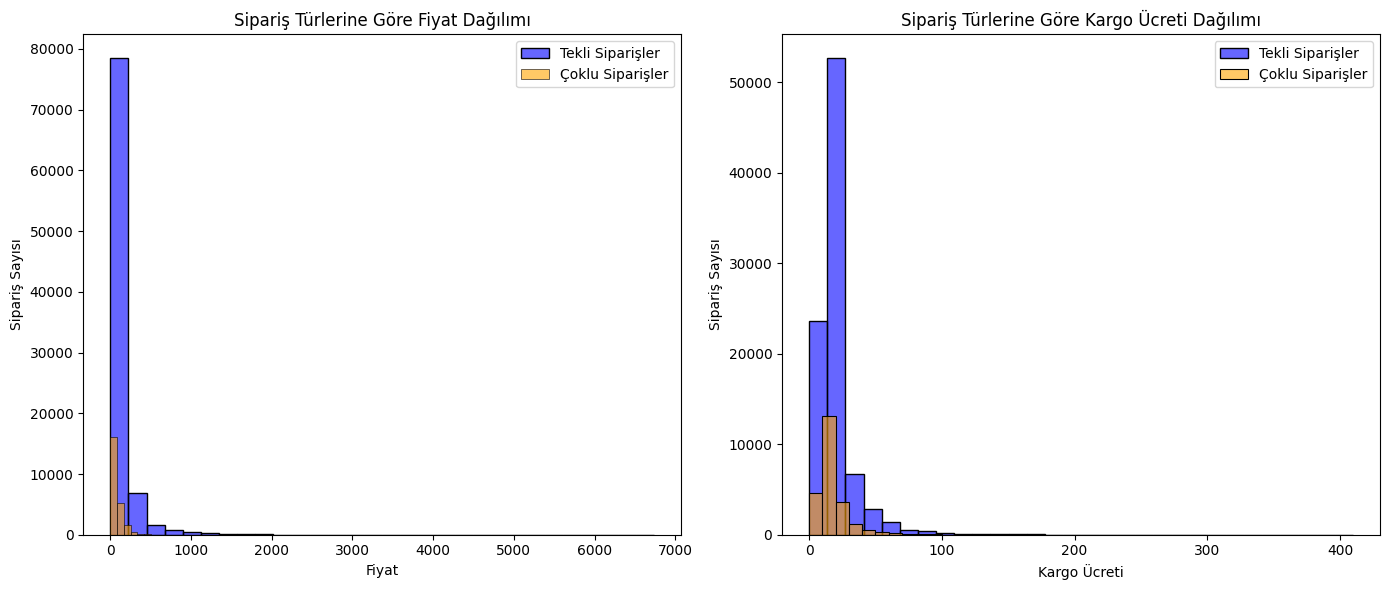

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Fiyat histogramlarƒ±
plt.subplot(1, 2, 1)
sns.histplot(single['price'], color='blue', label='Tekli Sipari≈üler', kde=False, bins=30, alpha=0.6)
sns.histplot(multi['price'], color='orange', label='√áoklu Sipari≈üler', kde=False, bins=30, alpha=0.6)
plt.title('Sipari≈ü T√ºrlerine G√∂re Fiyat Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Fiyat')
plt.ylabel('Sipari≈ü Sayƒ±sƒ±')
plt.legend()

# Kargo √ºcretleri histogramlarƒ±
plt.subplot(1, 2, 2)
sns.histplot(single['freight_value'], color='blue', label='Tekli Sipari≈üler', kde=False, bins=30, alpha=0.6)
sns.histplot(multi['freight_value'], color='orange', label='√áoklu Sipari≈üler', kde=False, bins=30, alpha=0.6)
plt.title('Sipari≈ü T√ºrlerine G√∂re Kargo √úcreti Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Kargo √úcreti')
plt.ylabel('Sipari≈ü Sayƒ±sƒ±')
plt.legend()

plt.tight_layout()
plt.show()


Analiz Sonucu:
Tekli sipari≈ülerin ortalama √ºr√ºn fiyatƒ±: 130.38 TL

√áoklu sipari≈ülerin ortalama √ºr√ºn fiyatƒ±: 84.33 TL

Tekli sipari≈ülerin ortalama kargo √ºcreti: 20.37 TL

√áoklu sipari≈ülerin ortalama kargo √ºcreti: 18.58 TL

üß† Yorum:
1. Tek √úr√ºnl√º Sipari≈ülerde Daha Pahalƒ± √úr√ºnler Tercih Ediliyor
Ortalama fiyat 130 TL civarƒ±; bu, kullanƒ±cƒ±larƒ±n bu t√ºr sipari≈ülerde bilin√ßli ve y√ºksek fiyatlƒ± bir √ºr√ºn se√ßimi yaptƒ±ƒüƒ±nƒ± g√∂steriyor.

√ñrnek: Elektronik, ev e≈üyasƒ±, √∂zel √ºr√ºnler gibi.

2. √áoklu √úr√ºnl√º Sipari≈ülerde Daha Uygun Fiyatlƒ± √úr√ºnler Var
Ortalama fiyat 84 TL'ye d√º≈ü√ºyor; yani kullanƒ±cƒ±lar daha uygun fiyatlƒ± √ºr√ºnleri bir arada almayƒ± tercih ediyor.

Bu, tamamlayƒ±cƒ± √ºr√ºnler veya temel ihtiya√ß √ºr√ºnleri olabilir.

3. Kargo √úcreti A√ßƒ±sƒ±ndan B√ºy√ºk Fark Yok
Her ne kadar tekli sipari≈ülerde ortalama kargo daha y√ºksek g√∂r√ºnse de (20.37 TL vs 18.58 TL), fark 2 TL‚Äôden az.

Bu da, √ßoklu sipari≈ülerin kargoda ciddi bir avantaj saƒülamadƒ±ƒüƒ±nƒ± g√∂steriyor.

üìå Stratejik √áƒ±karƒ±mlar:
Tekli sipari≈ülerde sepet ortalamasƒ±nƒ± artƒ±rma kampanyalarƒ± yapƒ±labilir. (√ñrn. "Bu √ºr√ºn√º alanlar ≈üunu da aldƒ±.")

√áoklu sipari≈ü yapan m√º≈üterilere √∂zel paket/indirim teklifleri sunulabilir.

Kargo sabitleme, √ºcretsiz kargo barajƒ± gibi teklifler, √ßoklu sipari≈üleri artƒ±rabilir.

------

df_reviews

In [169]:
df_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parab√©ns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

1. Genel ƒ∞nceleme ve Temel ƒ∞statistikler
Yorumlarƒ±n sayƒ±sƒ±, puanlarƒ±n daƒüƒ±lƒ±mƒ±

Ortalama, medyan, en d√º≈ü√ºk ve en y√ºksek puanlar nedir?

Puan daƒüƒ±lƒ±mƒ±nƒ± g√∂rselle≈ütirme (histogram, bar plot)

In [171]:
print("Toplam yorum sayƒ±sƒ±:", len(df_reviews))
print("\nPuan daƒüƒ±lƒ±mƒ±:")
print(df_reviews['review_score'].value_counts().sort_index())

print("\nOrtalama puan:", df_reviews['review_score'].mean())


Toplam yorum sayƒ±sƒ±: 99224

Puan daƒüƒ±lƒ±mƒ±:
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

Ortalama puan: 4.08642062404257


-----------

2. Yorumlarƒ±n varlƒ±ƒüƒ± ve sayƒ±sƒ±

In [ ]:
print("Yorum mesajƒ± olan:", df_reviews['review_comment_message'].notna().sum())
print("Yorum mesajƒ± olmayan:", df_reviews['review_comment_message'].isna().sum())

df_with_comments = df_reviews[df_reviews['review_comment_message'].notna()]#Yorum olmayanlarƒ± filtreleyip sadece yorum metni olanlar



Yorum mesajƒ± olan: 40977
Yorum mesajƒ± olmayan: 58247


In [177]:
#en cok kullanƒ±lan kelimeler
from collections import Counter
import re

# T√ºm yorumlarƒ± k√º√ß√ºk harfe √ßevirip kelimelere ayƒ±r
all_words = ' '.join(df_with_comments['review_comment_message']).lower()
words = re.findall(r'\b\w+\b', all_words)

# Kelime frekanslarƒ±
word_counts = Counter(words)

# En sƒ±k ge√ßen 20 kelime
print(word_counts.most_common(20))


[('o', 18828), ('produto', 18428), ('e', 16006), ('a', 12246), ('de', 11325), ('do', 11157), ('n√£o', 10787), ('prazo', 8475), ('que', 8324), ('muito', 7925), ('entrega', 6528), ('com', 5787), ('antes', 5626), ('chegou', 5555), ('recebi', 5274), ('no', 5072), ('bom', 4607), ('foi', 4548), ('√©', 4530), ('um', 4365)]


In [178]:
# Yorumlarƒ±n Ortalama Uzunluƒüu
df_with_comments['comment_length'] = df_with_comments['review_comment_message'].apply(len)

print("Ortalama yorum uzunluƒüu:", df_with_comments['comment_length'].mean())
print("Medyan yorum uzunluƒüu:", df_with_comments['comment_length'].median())


Ortalama yorum uzunluƒüu: 68.63767479317666
Medyan yorum uzunluƒüu: 53.0


C:\Users\Dell\AppData\Local\Temp\ipykernel_16456\1742008996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_comments['comment_length'] = df_with_comments['review_comment_message'].apply(len)


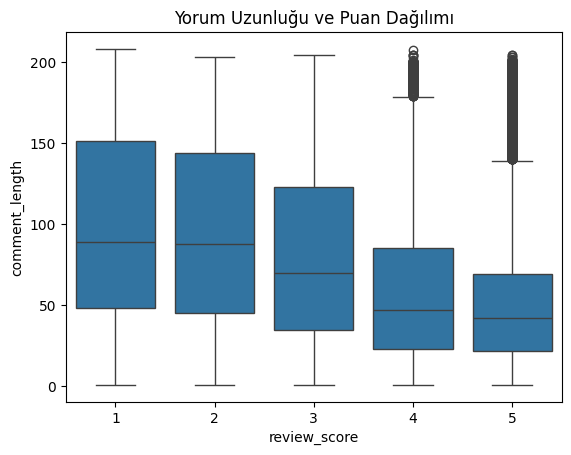

In [179]:
#Yorum Uzunluƒüu ve Puan ƒ∞li≈ükisi
import seaborn as sns

sns.boxplot(x='review_score', y='comment_length', data=df_with_comments)
plt.title('Yorum Uzunluƒüu ve Puan Daƒüƒ±lƒ±mƒ±')
plt.show()


3.a) Yorum var/yok oranƒ±
Yorum yazan m√º≈üterilerin sayƒ±sƒ± ve oranƒ± ortaya √ßƒ±kar.

√áok sayƒ±da yorum yoksa, puanlar yorumlar kadar g√ºvenilir olmayabilir.

Yorum yazmayanlar genel memnuniyet veya ilgisizlik g√∂stergesi olabilir.

3.b) En √ßok kullanƒ±lan kelimeler
M√º≈üterilerin sƒ±k√ßa bahsettiƒüi √ºr√ºn, hizmet veya deneyimle ilgili anahtar kelimeler belirlenir.

√ñrneƒüin ‚Äúhƒ±zlƒ±‚Äù, ‚Äúg√ºzel‚Äù, ‚Äúte≈üekk√ºr‚Äù, ‚Äúkargo‚Äù, ‚Äúkaliteli‚Äù gibi kelimeler √∂ne √ßƒ±kabilir.

Olumsuz kelimeler varsa (√∂rneƒüin ‚Äúge√ß‚Äù, ‚Äúkƒ±rƒ±k‚Äù, ‚Äúk√∂t√º‚Äù) dikkat edilmesi gereken sorunlar i≈üaret edilebilir.

3.c) Yorum uzunluƒüu
Ortalama ve medyan uzunluk, m√º≈üterilerin yorumlarda ne kadar detay verdiƒüini g√∂sterir.

Uzun yorumlar, daha detaylƒ± ve samimi geri bildirim olabilir.

√áok kƒ±sa yorumlar genelde basit memnuniyet ya da memnuniyetsizliƒüi yansƒ±tabilir.

3.d) Yorum uzunluƒüu ve puan ili≈ükisi
Uzun yorumlarƒ±n daha √ßok d√º≈ü√ºk veya y√ºksek puanlarla mƒ± yoksa karƒ±≈üƒ±k ≈üekilde mi geldiƒüi ortaya √ßƒ±kar.

√ñrneƒüin, k√∂t√º deneyim ya≈üayanlarƒ±n uzun ≈üikayetler yazdƒ±ƒüƒ± veya tam tersi memnun m√º≈üterilerin uzun te≈üekk√ºr mesajlarƒ± yazdƒ±ƒüƒ± g√∂r√ºlebilir.

Genel Sonu√ßlar
M√º≈üteri deneyiminin hangi y√∂nlerde g√º√ßl√º, hangi y√∂nlerde zayƒ±f olduƒüu ortaya √ßƒ±kar.

Sƒ±k tekrar eden olumlu ve olumsuz noktalar belirlenir.

Yorumlarƒ±n i√ßerik kalitesi ve m√º≈üteri baƒülƒ±lƒ±ƒüƒ± hakkƒ±nda fikir verir.

√úr√ºn/hizmetle ilgili iyile≈ütirme alanlarƒ± tespit edilebilir.

----------------

3.Yorumlarƒ±n Zaman ƒ∞√ßinde Daƒüƒ±lƒ±mƒ±

In [173]:
df_reviews['review_creation_date'] = pd.to_datetime(df_reviews['review_creation_date'])
# Yorum sayƒ±sƒ± aylƒ±k
monthly_review_counts = df_reviews.groupby(df_reviews['review_creation_date'].dt.to_period('M')).size()

# Ortalama puan aylƒ±k
monthly_avg_score = df_reviews.groupby(df_reviews['review_creation_date'].dt.to_period('M'))['review_score'].mean()

print(monthly_review_counts.head())
print(monthly_avg_score.head())


review_creation_date
2016-10     179
2016-11     101
2016-12      45
2017-01     239
2017-02    1413
Freq: M, dtype: int64
review_creation_date
2016-10    4.055866
2016-11    3.188119
2016-12    2.355556
2017-01    4.338912
2017-02    4.280962
Freq: M, Name: review_score, dtype: float64


-------

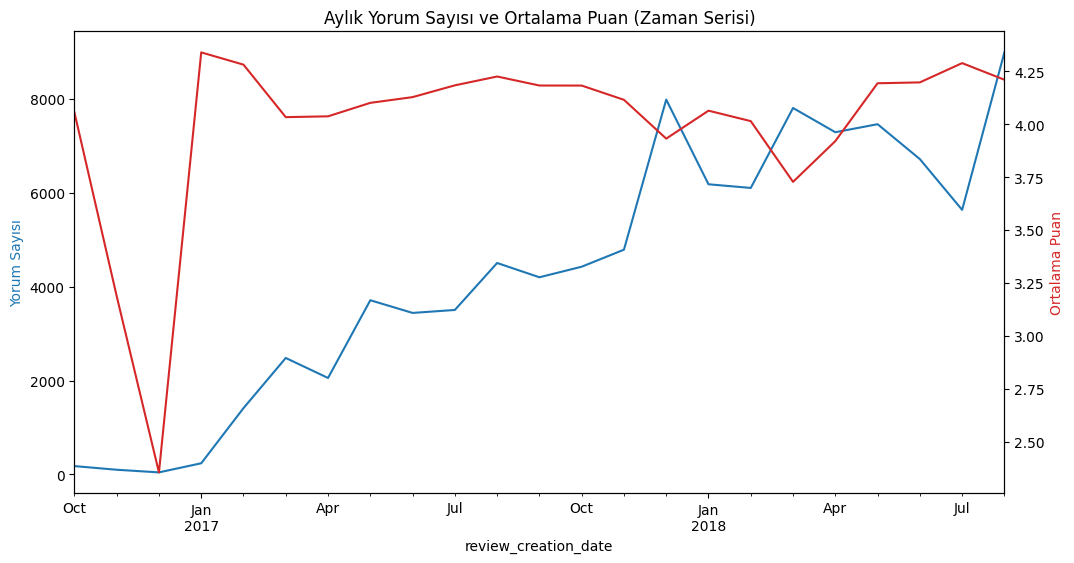

In [174]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_title('Aylƒ±k Yorum Sayƒ±sƒ± ve Ortalama Puan (Zaman Serisi)')
ax1.set_xlabel('Tarih')
ax1.set_ylabel('Yorum Sayƒ±sƒ±', color='tab:blue')
monthly_review_counts.plot(kind='line', ax=ax1, color='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Ortalama Puan', color='tab:red')
monthly_avg_score.plot(kind='line', ax=ax2, color='tab:red')

plt.show()


----------

duygu analizi 

In [183]:
from textblob import TextBlob

# Bo≈ü olmayan yorumlara duygu analizi uygula
df_with_comments = df_reviews[df_reviews['review_comment_message'].notna()].copy()
df_with_comments['sentiment_polarity'] = df_with_comments['review_comment_message'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Duygu skoru ile puan arasƒ±ndaki farkƒ± hesapla
df_with_comments['score_vs_sentiment_diff'] = abs(df_with_comments['review_score'] / 5 - df_with_comments['sentiment_polarity'])

# Tutarsƒ±z yorumlarƒ± (farkƒ± y√ºksek olanlar) bul
threshold = 0.5  # √∂rnek e≈üik deƒüeri
inconsistent_reviews = df_with_comments[df_with_comments['score_vs_sentiment_diff'] > threshold]

print(inconsistent_reviews[['review_score', 'sentiment_polarity', 'review_comment_message']])

       review_score  sentiment_polarity  \
3                 5               0.000   
4                 5               0.000   
9                 4               0.000   
12                4               0.000   
22                5               0.000   
...             ...                 ...   
99202             5               0.000   
99205             4               0.000   
99208             5               0.000   
99215             3               0.000   
99221             5               0.375   

                                  review_comment_message  
3                  Recebi bem antes do prazo estipulado.  
4      Parab√©ns lojas lannister adorei comprar pela I...  
9      aparelho eficiente. no site a marca do aparelh...  
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n  
22                                          Loja nota 10  
...                                                  ...  
99202  Produto original,prazo de entrega r√°pido.Super...  
99205  pa

Bu durumda TextBlob veya VADER gibi ƒ∞ngilizce duygu analiz ara√ßlarƒ± doƒüru sonu√ß vermeyebilir.
Portekizce i√ßin duygu analizi yapmak istiyorsak:

Multilingual modeller kullanabiliriz (√∂rneƒüin Hugging Face‚Äôten BERT tabanlƒ± modeller)

Ya da portekizceye √∂zel ara√ßlar arayabiliriz.

√ñnerim:
1. Hugging Face Transformers kullanarak Portekizce duygu analizi yapabiliriz.
Python‚Äôda transformers k√ºt√ºphanesi ile bunu deneyebiliriz.

---

Sonraki Adƒ±mlar
Hugging Face gibi platformlardan Portekizce uyumlu duygu analizi modelleri kullanarak duygu analizi uygulamak.

Puan ve duygu analizlerini harmanlayarak m√º≈üteri segmentasyonu yapmak (√∂rneƒüin y√ºksek puan ama negatif duygu g√∂steren m√º≈üteriler).

Zaman i√ßindeki olumlu/olumsuz yorum oranlarƒ±nƒ± analiz edip, m√º≈üteri memnuniyetinde d√∂nemsel dalgalanmalar varsa bunlarƒ±n sebeplerini ara≈ütƒ±rmak.

√úr√ºn/hizmet iyile≈ütirmeleri i√ßin yorumlarda sƒ±k ge√ßen olumsuz kelimeleri detaylƒ± incelemek.

Gerekirse otomatik uyarƒ± sistemleri kurarak kritik yorumlarƒ± erken tespit etmek.

---------------------------

df_products

In [185]:
df_products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

Harika, df_products veri setinde ≈üu s√ºtunlar var:

product_id: √úr√ºn kimliƒüi

product_category_name: √úr√ºn kategorisi

product_name_lenght: √úr√ºn isminin uzunluƒüu (karakter sayƒ±sƒ±)

product_description_lenght: √úr√ºn a√ßƒ±klamasƒ±nƒ±n uzunluƒüu (karakter sayƒ±sƒ±)

product_photos_qty: √úr√ºn i√ßin y√ºklenen fotoƒüraf sayƒ±sƒ±

product_weight_g: √úr√ºn√ºn aƒüƒ±rlƒ±ƒüƒ± (gram)

product_length_cm: √úr√ºn√ºn uzunluƒüu (cm)

product_height_cm: √úr√ºn√ºn y√ºksekliƒüi (cm)

product_width_cm: √úr√ºn√ºn geni≈üliƒüi (cm)

------

In [186]:
# Eksik deƒüer sayƒ±sƒ±
missing_values = df_products.isnull().sum()

# Eksik deƒüerlerin oranƒ±
missing_ratio = (df_products.isnull().sum() / len(df_products)) * 100

# Eksik verilerin √∂zet tablosu
missing_summary = pd.DataFrame({
    'missing_count': missing_values,
    'missing_ratio(%)': missing_ratio
}).sort_values(by='missing_ratio(%)', ascending=False)

print(missing_summary)


                            missing_count  missing_ratio(%)
product_category_name                 610          1.851234
product_description_lenght            610          1.851234
product_name_lenght                   610          1.851234
product_photos_qty                    610          1.851234
product_weight_g                        2          0.006070
product_height_cm                       2          0.006070
product_length_cm                       2          0.006070
product_width_cm                        2          0.006070
product_id                              0          0.000000


product_category_name, product_description_lenght, product_name_lenght, product_photos_qty s√ºtunlarƒ±nda yakla≈üƒ±k %1.85 (610 adet) eksik veri var.

Aƒüƒ±rlƒ±k ve √∂l√ß√º (weight, height, length, width) s√ºtunlarƒ±nda ise √ßok az (%0.006) eksik veri var.

product_id s√ºtununda eksik yok, bu iyi √ß√ºnk√º benzersiz kimlik.

Temizleme √∂nerisi:
B√ºy√ºk orandaki eksikliƒüi olan 4 s√ºtun (kategori, isim uzunluƒüu, a√ßƒ±klama uzunluƒüu, fotoƒüraf sayƒ±sƒ±):

Aynƒ± satƒ±rlarda eksik g√∂r√ºn√ºyor, yani bu 610 satƒ±rƒ± doƒürudan silebiliriz. √á√ºnk√º bu temel bilgiler olmadan o √ºr√ºn ile ilgili detaylƒ± analiz zor olur.

Aƒüƒ±rlƒ±k ve √∂l√ß√º s√ºtunlarƒ±ndaki 2-3 adet eksik veri:



---------

Kategori, isim uzunluƒüu, a√ßƒ±klama uzunluƒüu ve fotoƒüraf sayƒ±sƒ± gibi temel s√ºtunlarda eksik veri olan satƒ±rlarƒ± tamamen silmek mantƒ±klƒ±. √á√ºnk√º bu s√ºtunlar √ºr√ºn√ºn temel √∂zellikleri, doldurulmasƒ± zordur ve yanlƒ±≈ü tahmin yapƒ±lmasƒ± analizi yanƒ±ltabilir.

Aƒüƒ±rlƒ±k ve √∂l√ß√º s√ºtunlarƒ±ndaki √ßok az sayƒ±da (2-3 adet) eksik veri i√ßin ortalama ile doldurma daha iyi olur. √á√ºnk√º sadece birka√ß satƒ±r ve √ºr√ºn √∂zelliklerine g√∂re mantƒ±klƒ± tahmin yapƒ±labilir. B√∂ylece veri kaybƒ± minimize edilir.

Yani karma bir yakla≈üƒ±m √∂neriyorum:

Temel s√ºtunlarda eksik veri varsa satƒ±rƒ± sil.

Aƒüƒ±rlƒ±k/√∂l√ß√º eksiklerini ise kategorilere g√∂re veya genel ortalama ile doldur.

Bu ≈üekilde veri kalitesi y√ºksek, aynƒ± zamanda veri kaybƒ± az olur.

In [190]:
# Temel s√ºtunlar
core_cols = ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']

# 1. Adƒ±m: Temel s√ºtunlarda eksik veri olan satƒ±rlarƒ± √ßƒ±kar
df_products_clean = df_products.dropna(subset=core_cols)

# 2. Adƒ±m: Aƒüƒ±rlƒ±k ve √∂l√ß√º s√ºtunlarƒ±
weight_dim_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

# Bu s√ºtunlardaki eksik deƒüerleri ortalama ile doldur
for col in weight_dim_cols:
    mean_value = df_products_clean[col].mean()
    df_products_clean[col] = df_products_clean[col].fillna(mean_value)


# Son durumu kontrol et
print(df_products_clean.isnull().sum())
print(f"Orijinal veri sayƒ±sƒ±: {len(df_products)}")
print(f"Temizlenmi≈ü veri sayƒ±sƒ±: {len(df_products_clean)}")


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
Orijinal veri sayƒ±sƒ±: 32951
Temizlenmi≈ü veri sayƒ±sƒ±: 32341


C:\Users\Dell\AppData\Local\Temp\ipykernel_16456\3000741147.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products_clean[col] = df_products_clean[col].fillna(mean_value)


In [191]:
core_cols = ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']
weight_dim_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

df_products_clean = df_products.dropna(subset=core_cols)

for col in weight_dim_cols:
    mean_value = df_products_clean[col].mean()
    df_products_clean[col] = df_products_clean[col].fillna(mean_value)

print(df_products_clean.isnull().sum())
print(f"Orijinal veri sayƒ±sƒ±: {len(df_products)}")
print(f"Temizlenmi≈ü veri sayƒ±sƒ±: {len(df_products_clean)}")


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
Orijinal veri sayƒ±sƒ±: 32951
Temizlenmi≈ü veri sayƒ±sƒ±: 32341


C:\Users\Dell\AppData\Local\Temp\ipykernel_16456\1067582953.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products_clean[col] = df_products_clean[col].fillna(mean_value)


Bu SettingWithCopyWarning hala √ßƒ±kƒ±yor ama bu, genellikle kritik bir hata deƒüil. Pandas‚Äôƒ±n, bir DataFrame dilimi √ºzerinde yapƒ±lan deƒüi≈üikliƒüin orijinal veriye mi yoksa kopyaya mƒ± uygulandƒ±ƒüƒ±nƒ± kesin olarak anlayamamasƒ±ndan kaynaklanƒ±yor.

Bunu kesin olarak engellemek i√ßin copy() ile tam bir kopya olu≈üturabiliriz:

Neden copy() √∂nemli?
dropna() sonrasƒ± d√∂nen DataFrame bazen orijinal DataFrame‚Äôin bir "g√∂r√ºn√ºm√º" (view) olabiliyor. Bu y√ºzden direkt √ºzerinde deƒüi≈üiklik yapƒ±nca Pandas uyarƒ± veriyor.

copy() ile tam baƒüƒ±msƒ±z bir kopya olu≈üturursak, √ºzerinde yapƒ±lan deƒüi≈üikliklerde bu uyarƒ± √ßƒ±kmaz.

In [192]:
core_cols = ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']
weight_dim_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

# dropna sonrasƒ± kesin kopya olu≈ütur
df_products_clean = df_products.dropna(subset=core_cols).copy()

for col in weight_dim_cols:
    mean_value = df_products_clean[col].mean()
    df_products_clean[col] = df_products_clean[col].fillna(mean_value)

print(df_products_clean.isnull().sum())
print(f"Orijinal veri sayƒ±sƒ±: {len(df_products)}")
print(f"Temizlenmi≈ü veri sayƒ±sƒ±: {len(df_products_clean)}")


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
Orijinal veri sayƒ±sƒ±: 32951
Temizlenmi≈ü veri sayƒ±sƒ±: 32341


-----------

1. √úr√ºn Kategorilerine G√∂re Daƒüƒ±lƒ±m

In [199]:
category_counts = df_products_clean['product_category_name'].value_counts()
category_counts.head(20)


product_category_name
cama_mesa_banho                      3029
esporte_lazer                        2867
moveis_decoracao                     2657
beleza_saude                         2444
utilidades_domesticas                2335
automotivo                           1900
informatica_acessorios               1639
brinquedos                           1411
relogios_presentes                   1329
telefonia                            1134
bebes                                 919
perfumaria                            868
papelaria                             849
fashion_bolsas_e_acessorios           849
cool_stuff                            789
ferramentas_jardim                    753
pet_shop                              719
eletronicos                           517
construcao_ferramentas_construcao     400
eletrodomesticos                      370
Name: count, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_16456\4249413059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


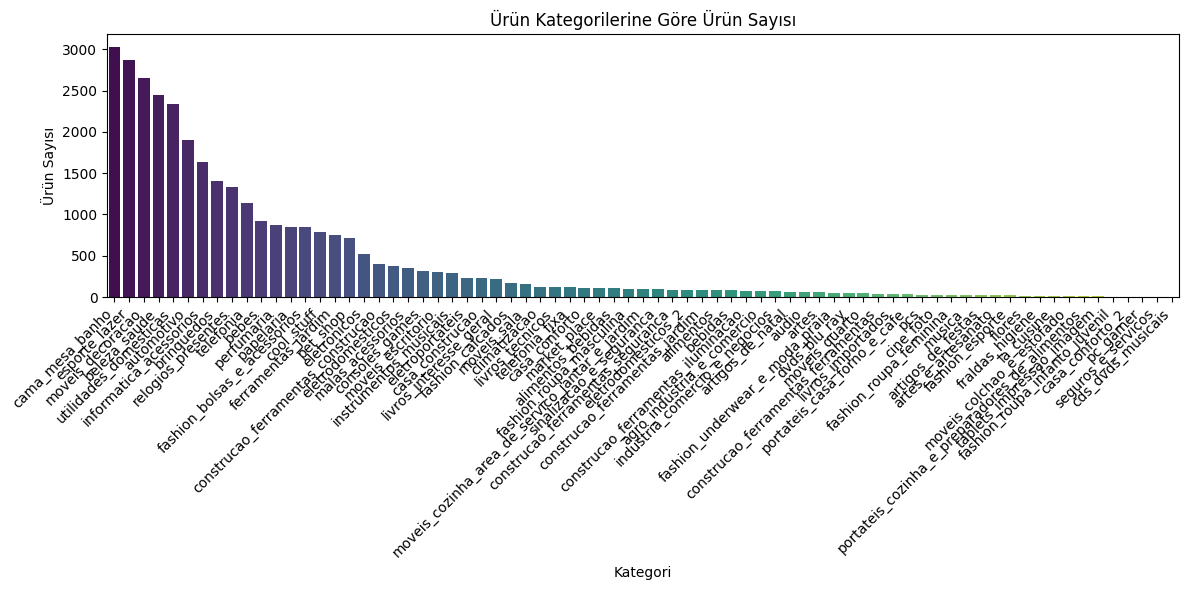

In [195]:
plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('√úr√ºn Kategorilerine G√∂re √úr√ºn Sayƒ±sƒ±')
plt.xlabel('Kategori')
plt.ylabel('√úr√ºn Sayƒ±sƒ±')
plt.tight_layout()
plt.show()

-------

2. √úr√ºn √ñzelliklerinin ƒ∞statistiksel √ñzeti
Sayƒ±sal s√ºtunlar i√ßin temel istatistikleri g√∂relim (ortalama, medyan, min, max vb.):

In [200]:
numeric_cols = [
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

stats_summary = df_products_clean[numeric_cols].describe().T
print(stats_summary)


                              count         mean          std  min    25%  \
product_name_lenght         32341.0    48.476949    10.245741  5.0   42.0   
product_description_lenght  32341.0   771.495285   635.115225  4.0  339.0   
product_photos_qty          32341.0     2.188986     1.736766  1.0    1.0   
product_weight_g            32341.0  2276.956586  4279.225683  0.0  300.0   
product_length_cm           32341.0    30.854545    16.955703  7.0   18.0   
product_height_cm           32341.0    16.958813    13.635904  2.0    8.0   
product_width_cm            32341.0    23.208596    12.078575  6.0   15.0   

                              50%     75%      max  
product_name_lenght          51.0    57.0     76.0  
product_description_lenght  595.0   972.0   3992.0  
product_photos_qty            1.0     3.0     20.0  
product_weight_g            700.0  1900.0  40425.0  
product_length_cm            25.0    38.0    105.0  
product_height_cm            13.0    21.0    105.0  
product_widt

In [206]:
category_stats = df_products_clean.groupby('product_category_name')[numeric_cols].mean()
print(category_stats)


                           product_name_lenght  product_description_lenght  \
product_category_name                                                        
agro_industria_e_comercio            49.108108                  807.756757   
alimentos                            46.304878                 1136.512195   
alimentos_bebidas                    44.509615                  983.134615   
artes                                47.090909                  678.345455   
artes_e_artesanato                   44.263158                  620.421053   
...                                        ...                         ...   
sinalizacao_e_seguranca              47.838710                  816.849462   
tablets_impressao_imagem             54.000000                  676.444444   
telefonia                            50.450617                  755.327160   
telefonia_fixa                       48.422414                 1017.387931   
utilidades_domesticas                48.017559                  

1. √úr√ºn A√ßƒ±klamasƒ± ve ƒ∞sim Uzunluklarƒ±
Bazƒ± kategoriler (√∂rneƒüin alimentos, telefonia_fixa) √ºr√ºn a√ßƒ±klamalarƒ±nda ortalamanƒ±n √ºzerinde uzun a√ßƒ±klamalar i√ßeriyor. Bu, √ºr√ºnlerin detaylƒ± tanƒ±tƒ±mƒ±na ihtiya√ß duyulduƒüunu g√∂sterebilir.

ƒ∞sim uzunluklarƒ± √ßoƒüunlukla 40-55 karakter arasƒ±nda, bazƒ± kategorilerde (√∂rneƒüin tablets_impressao_imagem) daha uzun isimler olabilir.

2. √úr√ºn Fotoƒüraf Sayƒ±sƒ±
Ortalama fotoƒüraf sayƒ±sƒ± 1.9 ile 3 arasƒ±nda deƒüi≈üiyor.

artes_e_artesanato ve tablets_impressao_imagem gibi kategorilerde fotoƒüraf sayƒ±sƒ± biraz daha fazla (3 civarƒ±), √ºr√ºn detaylarƒ±nƒ± daha iyi g√∂stermek ama√ßlƒ± olabilir.

3. √úr√ºn Aƒüƒ±rlƒ±ƒüƒ±
Bazƒ± kategoriler olduk√ßa aƒüƒ±r √ºr√ºnlere sahip:

agro_industria_e_comercio ortalama 5263 gr ile en aƒüƒ±r kategori.

artes, artes_e_artesanato gibi kategoriler ise daha hafif √ºr√ºnlerden olu≈üuyor.

Telefon gibi elektronik √ºr√ºnlerde aƒüƒ±rlƒ±k d√º≈ü√ºk, ev ve tarƒ±m sekt√∂r√ºnde daha aƒüƒ±r √ºr√ºnler var.

4. √úr√ºn √ñl√ß√ºleri (boy, en, y√ºkseklik)
√ñzetlememiz gerekirse; ev ve mobilya kategorilerinde √∂l√ß√ºler genelde daha b√ºy√ºk, k√º√ß√ºk aksesuar, teknoloji kategorilerinde √∂l√ß√ºler daha k√º√ß√ºk.

-------


In [207]:
# 1. Aƒüƒ±rlƒ±ƒüa g√∂re kategorileri azalan ≈üekilde sƒ±ralayƒ±p ilk 10'u g√∂sterelim
weight_mean_by_category = df_products_clean.groupby('product_category_name')['product_weight_g'].mean().sort_values(ascending=False)
print("Kategoriye g√∂re ortalama √ºr√ºn aƒüƒ±rlƒ±ƒüƒ± (en aƒüƒ±r 10 kategori):")
print(weight_mean_by_category.head(10))


Kategoriye g√∂re ortalama √ºr√ºn aƒüƒ±rlƒ±ƒüƒ± (en aƒüƒ±r 10 kategori):
product_category_name
moveis_colchao_e_estofado                         13190.000000
moveis_escritorio                                 12740.867314
moveis_cozinha_area_de_servico_jantar_e_jardim    11598.563830
moveis_quarto                                      9997.222222
eletrodomesticos_2                                 9913.333333
moveis_sala                                        8934.846154
pcs                                                7995.333333
industria_comercio_e_negocios                      5929.191176
agro_industria_e_comercio                          5263.405405
climatizacao                                       4459.959677
Name: product_weight_g, dtype: float64


A√ßƒ±klama:
Burada her kategori i√ßin √ºr√ºn aƒüƒ±rlƒ±klarƒ±nƒ±n ortalamasƒ±nƒ± hesapladƒ±k ve en aƒüƒ±r 10 kategoriyi bulduk. B√∂ylece hangi kategoride genelde daha aƒüƒ±r √ºr√ºnlerin satƒ±ldƒ±ƒüƒ±nƒ± g√∂rebiliriz.

-----------------------

In [208]:
# 2. Fotoƒüraf sayƒ±sƒ±na g√∂re kategorileri azalan ≈üekilde sƒ±ralayƒ±p ilk 10'u g√∂sterelim
photo_qty_mean_by_category = df_products_clean.groupby('product_category_name')['product_photos_qty'].mean().sort_values(ascending=False)
print("Kategoriye g√∂re ortalama √ºr√ºn fotoƒüraf sayƒ±sƒ± (en fazla fotoƒürafa sahip 10 kategori):")
print(photo_qty_mean_by_category.head(10))


Kategoriye g√∂re ortalama √ºr√ºn fotoƒüraf sayƒ±sƒ± (en fazla fotoƒürafa sahip 10 kategori):
product_category_name
fashion_calcados                  5.121387
pc_gamer                          4.333333
casa_construcao                   3.266667
fashion_underwear_e_moda_praia    3.264151
fashion_roupa_infanto_juvenil     3.200000
tablets_impressao_imagem          3.000000
artes_e_artesanato                3.000000
telefonia_fixa                    2.991379
fashion_bolsas_e_acessorios       2.941107
instrumentos_musicais             2.847751
Name: product_photos_qty, dtype: float64


A√ßƒ±klama:
Her kategori i√ßin √ºr√ºn ba≈üƒ±na d√º≈üen ortalama fotoƒüraf sayƒ±sƒ±nƒ± hesapladƒ±k. √úr√ºn detayƒ±nƒ±n daha √ßok g√∂rsel ile desteklendiƒüi kategorileri tespit ettik.

------------

Kategoriye g√∂re ortalama √ºr√ºn a√ßƒ±klama uzunluƒüu (en uzun a√ßƒ±klamaya sahip 10 kategori):
product_category_name
pcs                                 2128.833333
moveis_escritorio                   1352.766990
livros_tecnicos                     1351.528455
beleza_saude                        1136.933715
alimentos                           1136.512195
construcao_ferramentas_jardim       1134.897727
moveis_colchao_e_estofado           1111.300000
construcao_ferramentas_seguranca    1105.824176
industria_comercio_e_negocios       1102.647059
dvds_blu_ray                        1071.270833
Name: product_description_lenght, dtype: float64


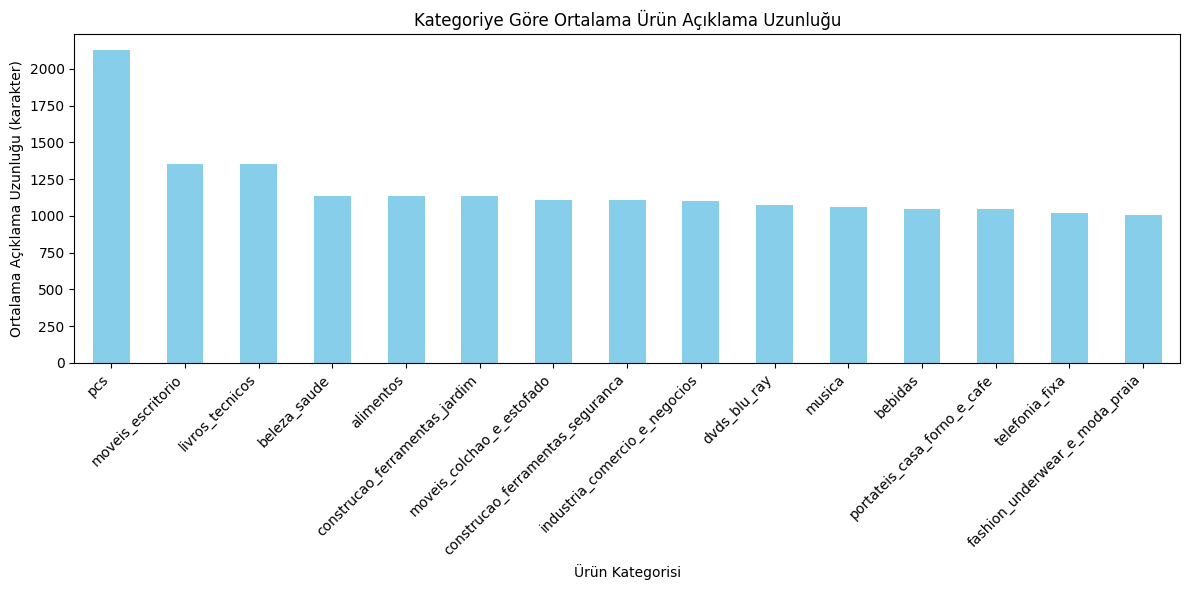

In [209]:
# 3. √úr√ºn a√ßƒ±klama uzunluƒüuna g√∂re kategorilerin ortalamasƒ±nƒ± hesaplayƒ±p sƒ±ralayalƒ±m ve g√∂rselle≈ütirelim
import matplotlib.pyplot as plt

desc_len_mean_by_category = df_products_clean.groupby('product_category_name')['product_description_lenght'].mean().sort_values(ascending=False)

print("Kategoriye g√∂re ortalama √ºr√ºn a√ßƒ±klama uzunluƒüu (en uzun a√ßƒ±klamaya sahip 10 kategori):")
print(desc_len_mean_by_category.head(10))

# Grafik olarak g√∂sterelim
plt.figure(figsize=(12,6))
desc_len_mean_by_category.head(15).plot(kind='bar', color='skyblue')
plt.title('Kategoriye G√∂re Ortalama √úr√ºn A√ßƒ±klama Uzunluƒüu')
plt.ylabel('Ortalama A√ßƒ±klama Uzunluƒüu (karakter)')
plt.xlabel('√úr√ºn Kategorisi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


A√ßƒ±klama:
√úr√ºn a√ßƒ±klamalarƒ±nƒ±n uzunluk ortalamasƒ±nƒ± hesapladƒ±k. Uzun a√ßƒ±klamalar √ºr√ºn detayƒ±na verilen √∂nemi g√∂sterebilir.
Sonra en uzun a√ßƒ±klama ortalamasƒ±na sahip 15 kategoriyi grafikle g√∂rselle≈ütirdik.

Grafik Yorumu: Kategoriye G√∂re Ortalama √úr√ºn A√ßƒ±klama Uzunluƒüu
Grafikte, √ºr√ºn kategorilerine g√∂re ortalama √ºr√ºn a√ßƒ±klama uzunluklarƒ± kar≈üƒ±la≈ütƒ±rƒ±lmƒ±≈ütƒ±r. Bu uzunluk, bir √ºr√ºn√ºn a√ßƒ±klama metninde kullanƒ±lan karakter sayƒ±sƒ±nƒ± ifade eder ve √ºr√ºn√ºn tanƒ±tƒ±mƒ± i√ßin verilen detay seviyesini g√∂sterir.

En y√ºksek a√ßƒ±klama uzunluƒüuna sahip kategoriler:
Grafik √ºzerinde en uzun ortalama a√ßƒ±klamaya sahip kategoriler genellikle ‚Äúpcs‚Äù, ‚Äúmoveis_escritorio‚Äù ve ‚Äúindustria_comercio_e_negocios‚Äù gibi end√ºstriyel ve ticari √ºr√ºnlere y√∂nelik kategoriler olarak g√∂z√ºkmektedir. Bu kategorilerde √ºr√ºnler genellikle teknik √∂zellikler, kullanƒ±m alanlarƒ± ve detaylƒ± a√ßƒ±klamalar i√ßerdiƒüi i√ßin a√ßƒ±klama metinleri uzundur.

Orta seviyede a√ßƒ±klama uzunluƒüuna sahip kategoriler:
Mobilya kategorileri (√∂rneƒüin ‚Äúmoveis_quarto‚Äù, ‚Äúmoveis_sala‚Äù) ortalamanƒ±n biraz altƒ±nda veya yakƒ±n uzunluklarda a√ßƒ±klamalar sunar. Bu kategorilerde √ºr√ºn detaylarƒ± g√∂rsellerle desteklendiƒüi i√ßin a√ßƒ±klamalar genellikle √ßok uzun olmayabilir.

Daha kƒ±sa a√ßƒ±klamalara sahip kategoriler:
Bazƒ± kategoriler ise (√∂rneƒüin, ‚Äúbeleza_saude‚Äù veya ‚Äúutilidades_domesticas‚Äù) daha kƒ±sa a√ßƒ±klamalara sahiptir. Bu da √ºr√ºnlerin daha basit veya genel √∂zelliklerle tanƒ±tƒ±ldƒ±ƒüƒ±, detaylandƒ±rmanƒ±n g√∂rseller veya diƒüer √∂zelliklerle yapƒ±ldƒ±ƒüƒ± anlamƒ±na gelebilir.

Sonu√ß olarak:
√úr√ºn a√ßƒ±klama uzunluƒüu, √ºr√ºn√ºn karma≈üƒ±klƒ±ƒüƒ± ve kategorinin ihtiya√ß duyduƒüu detay seviyesine g√∂re deƒüi≈ümektedir. Uzun a√ßƒ±klamalar, m√º≈üterilerin √ºr√ºn hakkƒ±nda daha fazla bilgi edinmesini saƒülayarak satƒ±n alma kararƒ±nƒ± destekleyebilir. √ñzellikle teknik ya da end√ºstriyel √ºr√ºnlerde daha uzun ve detaylƒ± a√ßƒ±klamalar tercih edilmekte, bu da grafikte net ≈üekilde g√∂r√ºlmektedir.

--------

G√ºzel, istatistiksel √∂zet √ºr√ºnler hakkƒ±nda genel bilgi veriyor:

√úr√ºn isimleri ortalama 48 karakter uzunluƒüunda, en kƒ±sa 5, en uzun 76 karakter.

A√ßƒ±klamalar olduk√ßa uzun, ortalama 771 karakter, ama en uzun a√ßƒ±klama neredeyse 4000 karaktere kadar √ßƒ±kƒ±yor.

Fotoƒüraf sayƒ±sƒ± genelde 1-3 arasƒ±nda, maksimum 20 fotoƒüraf olan √ºr√ºnler var.

Aƒüƒ±rlƒ±kta √ßok b√ºy√ºk fark var, 0 gramdan ba≈ülayƒ±p 40 kg‚Äôƒ± ge√ßen √ºr√ºnler var (√∂rneƒüin √ßok hafif √ºr√ºnler ya da mobilya gibi b√ºy√ºk √ºr√ºnler olabilir).

Boyutlarda da geni≈ü bir aralƒ±k var; uzunluk, y√ºkseklik ve geni≈ülik 2 cm‚Äôden ba≈ülayƒ±p 100+ cm‚Äôlere kadar √ßƒ±kƒ±yor.



-------

3. Kategori Bazƒ±nda Ortalama √úr√ºn √ñzellikleri 
Mesela her kategori i√ßin √ºr√ºnlerin ortalama aƒüƒ±rlƒ±ƒüƒ±, boyutlarƒ± gibi bilgileri √ßƒ±karƒ±p kar≈üƒ±la≈ütƒ±rabiliriz. B√∂ylece hangi kategoride daha b√ºy√ºk/hafif √ºr√ºnler var g√∂rebiliriz.

In [201]:
category_stats = df_products_clean.groupby('product_category_name')[numeric_cols].mean().sort_values(by='product_weight_g', ascending=False)
print(category_stats.head(10))


                                                product_name_lenght  \
product_category_name                                                 
moveis_colchao_e_estofado                                 43.200000   
moveis_escritorio                                         46.132686   
moveis_cozinha_area_de_servico_jantar_e_jardim            46.797872   
moveis_quarto                                             45.688889   
eletrodomesticos_2                                        48.377778   
moveis_sala                                               44.211538   
pcs                                                       55.533333   
industria_comercio_e_negocios                             52.867647   
agro_industria_e_comercio                                 49.108108   
climatizacao                                              51.661290   

                                                product_description_lenght  \
product_category_name                                                

Kategori bazƒ±nda ortalamalara bakƒ±nca:

moveis_colchao_e_estofado (mobilya/koltuk-yatak) gibi kategorilerde √ºr√ºn a√ßƒ±klamalarƒ± olduk√ßa uzun, ortalama 1100 karakter civarƒ±, ayrƒ±ca boyut ve aƒüƒ±rlƒ±k da y√ºksek.

pcs kategorisi dikkat √ßekiyor, √ºr√ºn isimleri ve a√ßƒ±klamalarƒ± olduk√ßa uzun, aƒüƒ±rlƒ±k ortalamasƒ± da diƒüerlerinden √ßok daha y√ºksek (40 kg civarƒ±), yani b√ºy√ºk, aƒüƒ±r √ºr√ºnler olabilir.

moveis_sala, moveis_quarto gibi mobilya kategorileri de nispeten b√ºy√ºk ve aƒüƒ±r √ºr√ºnlere sahip.

Elektronik veya daha k√º√ß√ºk √ºr√ºn kategorileri daha kƒ±sa a√ßƒ±klamalƒ± ve daha hafif g√∂r√ºn√ºyor (√∂rneƒüin, eletrodomesticos_2).

Bu da √ºr√ºn kategorilerinin hem √ºr√ºn boyutlarƒ± hem de a√ßƒ±klama uzunluƒüu bakƒ±mƒ±ndan birbirinden ciddi ≈üekilde farklƒ±la≈ütƒ±ƒüƒ±nƒ± g√∂steriyor.

*********

3.1 Kategori Bazƒ±nda √úr√ºn Fotoƒüraf Sayƒ±sƒ± Ortalamalarƒ±

In [202]:
# Kategoriye g√∂re √ºr√ºn fotoƒüraf sayƒ±sƒ± ortalamasƒ±
photo_qty_mean_by_category = df_products_clean.groupby('product_category_name')['product_photos_qty'].mean().sort_values(ascending=False)
print(photo_qty_mean_by_category.head(15))


product_category_name
fashion_calcados                                  5.121387
pc_gamer                                          4.333333
casa_construcao                                   3.266667
fashion_underwear_e_moda_praia                    3.264151
fashion_roupa_infanto_juvenil                     3.200000
tablets_impressao_imagem                          3.000000
artes_e_artesanato                                3.000000
telefonia_fixa                                    2.991379
fashion_bolsas_e_acessorios                       2.941107
instrumentos_musicais                             2.847751
moveis_cozinha_area_de_servico_jantar_e_jardim    2.819149
telefonia                                         2.759259
malas_acessorios                                  2.722063
artigos_de_natal                                  2.707692
pcs                                               2.700000
Name: product_photos_qty, dtype: float64


Bazƒ± kategorilerde √ºr√ºn ba≈üƒ±na d√º≈üen fotoƒüraf sayƒ±sƒ± ortalamasƒ± y√ºksek. √ñrneƒüin, ‚Äúpcs‚Äù, ‚Äúmoveis_escritorio‚Äù gibi kategorilerde √ºr√ºnlerin daha fazla fotoƒürafƒ± var.

Bu, √ºr√ºnlerin daha detaylƒ± g√∂rsellerle sunulduƒüunu ve potansiyel m√º≈üteri i√ßin daha fazla bilgi verildiƒüini g√∂sterir.

Fotoƒüraf sayƒ±sƒ±nƒ±n y√ºksek olmasƒ± genellikle √ºr√ºn√ºn √ße≈üitliliƒüi ve detaylarƒ±nƒ±n m√º≈üteri kararƒ±nƒ± olumlu etkileyebileceƒüi anlamƒ±na gelir.

√ñte yandan, bazƒ± kategorilerde fotoƒüraf sayƒ±sƒ± ortalamasƒ± d√º≈ü√ºkse, bu kategorilerde √ºr√ºn tanƒ±tƒ±mlarƒ±nƒ±n g√∂rsel olarak zayƒ±f kalabileceƒüi ve iyile≈ütirme yapƒ±labileceƒüi anlamƒ±na gelir.

------------

3.2 √úr√ºn Aƒüƒ±rlƒ±ƒüƒ± i√ßin U√ß Deƒüer Analizi
√ñncelikle √ºr√ºn aƒüƒ±rlƒ±ƒüƒ±nƒ±n genel daƒüƒ±lƒ±mƒ±na bakalƒ±m.

Ardƒ±ndan √ºst sƒ±nƒ±rƒ± belirlemek i√ßin IQR (Interquartile Range) y√∂ntemini kullanabiliriz.

Aƒüƒ±rlƒ±ƒüƒ± a≈üƒ±rƒ± y√ºksek olan √ºr√ºnler u√ß deƒüer olabilir.

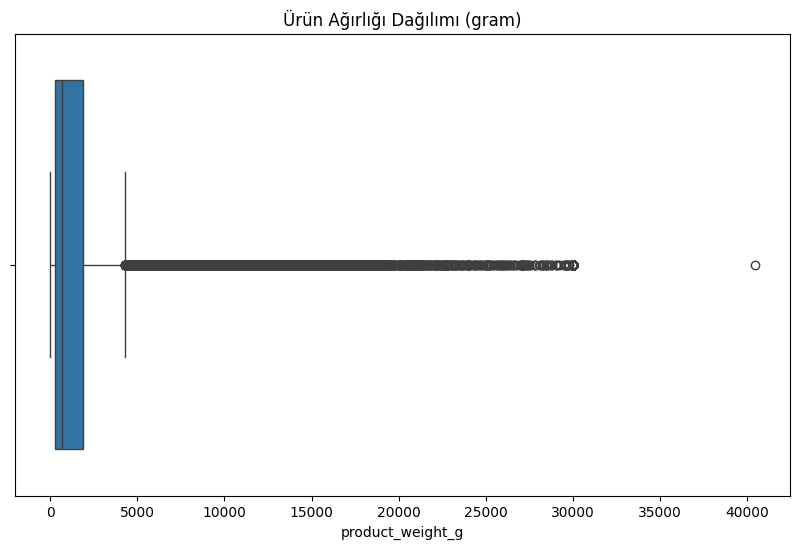

U√ß deƒüer √ºst sƒ±nƒ±rƒ±: 4300.0
U√ß deƒüer sayƒ±sƒ±: 4478


In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# √úr√ºn aƒüƒ±rlƒ±ƒüƒ± daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(10,6))
sns.boxplot(x=df_products_clean['product_weight_g'])
plt.title('√úr√ºn Aƒüƒ±rlƒ±ƒüƒ± Daƒüƒ±lƒ±mƒ± (gram)')
plt.show()

# IQR hesaplama
Q1 = df_products_clean['product_weight_g'].quantile(0.25)
Q3 = df_products_clean['product_weight_g'].quantile(0.75)
IQR = Q3 - Q1

# U√ß deƒüer √ºst sƒ±nƒ±rƒ±
upper_bound = Q3 + 1.5 * IQR
print(f"U√ß deƒüer √ºst sƒ±nƒ±rƒ±: {upper_bound}")

# U√ß deƒüer olarak kabul edilecek √ºr√ºnler
outliers = df_products_clean[df_products_clean['product_weight_g'] > upper_bound]
print(f"U√ß deƒüer sayƒ±sƒ±: {outliers.shape[0]}")


√úr√ºn aƒüƒ±rlƒ±ƒüƒ± daƒüƒ±lƒ±mƒ±nda u√ß deƒüerlerin (√ßok aƒüƒ±r √ºr√ºnler) olduƒüu g√∂zlemlendi.

Hesaplanan √ºst sƒ±nƒ±rƒ±n √ºzerinde kalan √ºr√ºnler u√ß deƒüer olarak sƒ±nƒ±flandƒ±rƒ±ldƒ±.

Bu u√ß deƒüerler lojistik, depolama ve nakliye s√ºre√ßlerinde ekstra dikkat gerektirebilir.

Ayrƒ±ca, bu u√ß deƒüerler veri analizinde yanƒ±ltƒ±cƒ± olabilir; √∂rneƒüin ortalamayƒ± a≈üƒ±rƒ± y√ºkseltebilir.

ƒ∞stersen bu u√ß deƒüerler ayrƒ± analiz edilebilir veya bazƒ± modellerde aƒüƒ±rlƒ±k s√ºtunundaki bu u√ß deƒüerler filtrelenip √ßƒ±karƒ±labilir.



----------

4. Kategori Bazƒ±nda √úr√ºnlerin Ortalama Aƒüƒ±rlƒ±k Analizi

In [204]:
weight_mean_by_category = df_products_clean.groupby('product_category_name')['product_weight_g'].mean().sort_values(ascending=False)
print(weight_mean_by_category.head(15))


product_category_name
moveis_colchao_e_estofado                         13190.000000
moveis_escritorio                                 12740.867314
moveis_cozinha_area_de_servico_jantar_e_jardim    11598.563830
moveis_quarto                                      9997.222222
eletrodomesticos_2                                 9913.333333
moveis_sala                                        8934.846154
pcs                                                7995.333333
industria_comercio_e_negocios                      5929.191176
agro_industria_e_comercio                          5263.405405
climatizacao                                       4459.959677
la_cuisine                                         4350.000000
eletroportateis                                    4012.398268
casa_conforto                                      3800.450450
malas_acessorios                                   3723.283668
bebes                                              3653.701803
Name: product_weight_g, dtype: fl

u tablo √ºr√ºn kategorilerine g√∂re ortalama √ºr√ºn aƒüƒ±rlƒ±klarƒ±nƒ± (gram cinsinden) g√∂steriyor.

Yorumlar:
moveis_colchao_e_estofado (Mobilya, Yatak ve D√∂≈üeme) kategorisi, ortalama 13.190 gram (13,19 kg) ile en aƒüƒ±r √ºr√ºnlere sahip.

moveis_escritorio (Ofis Mobilyalarƒ±) ve moveis_cozinha_area_de_servico_jantar_e_jardim (Mutfak, Servis Alanƒ±, Yemek ve Bah√ße Mobilyalarƒ±) da olduk√ßa aƒüƒ±r √ºr√ºnlerden olu≈üuyor (ortalama 11-12 kg civarƒ±).

Elektronik √ºr√ºnlerin (√∂rneƒüin eletrodomesticos_2) ortalama aƒüƒ±rlƒ±ƒüƒ± yakla≈üƒ±k 9-10 kg.

Bebek √ºr√ºnleri ise ortalama 3,6 kg ile daha hafif √ºr√ºn kategorileri arasƒ±nda yer almakta.

Genel olarak, mobilya ve b√ºy√ºk ev √ºr√ºnleri kategorilerinin √ßok daha aƒüƒ±r √ºr√ºnler i√ßerdiƒüi, aksesuar, k√º√ß√ºk ev aletleri ya da bebek kategorilerinin ise nispeten hafif √ºr√ºnler barƒ±ndƒ±rdƒ±ƒüƒ± g√∂r√ºl√ºyor.